

(R 3.3.1)

# Risk minimization and profit maximization on behalf of the bank



### Task

Given the German credit Datasets (<a href="https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/german_credit.csv">german_credit.csv</a>), make an explorative data analysis and build a binary classifier to predict wether or not a new  applicant to bank loan can be approved.

### Data (brief description)

The dataset contains a wide range of features such as the Account Balance, Occupation, Sex and Marital Status, etc. all associated with a class (good or bad) indicating the risk of giving the loan to the applicant.



### Load and explore the dataset

In [136]:


getwd()


df_all <- read.csv('./german_credit.csv')


summary(df_all)


[1] "C:/Users/Dekou/Desktop/R_project/energy_efficiency"

 Creditability Account.Balance Duration.of.Credit..month.
 Min.   :0.0   Min.   :1.000   Min.   : 4.0              
 1st Qu.:0.0   1st Qu.:1.000   1st Qu.:12.0              
 Median :1.0   Median :2.000   Median :18.0              
 Mean   :0.7   Mean   :2.577   Mean   :20.9              
 3rd Qu.:1.0   3rd Qu.:4.000   3rd Qu.:24.0              
 Max.   :1.0   Max.   :4.000   Max.   :72.0              
 Payment.Status.of.Previous.Credit    Purpose       Credit.Amount  
 Min.   :0.000                     Min.   : 0.000   Min.   :  250  
 1st Qu.:2.000                     1st Qu.: 1.000   1st Qu.: 1366  
 Median :2.000                     Median : 2.000   Median : 2320  
 Mean   :2.545                     Mean   : 2.828   Mean   : 3271  
 3rd Qu.:4.000                     3rd Qu.: 3.000   3rd Qu.: 3972  
 Max.   :4.000                     Max.   :10.000   Max.   :18424  
 Value.Savings.Stocks Length.of.current.employment Instalment.per.cent
 Min.   :1.000        Min.   :1.000            

In [137]:
prop.table(table(df_all$Creditability))

#Target labels
unique(df_all$Creditability)


  0   1 
0.3 0.7 

[1] 1 0

The data set is imbalanced,

possible methods to handle this are: 

Undersampling (oversampling) the majority (minority) class

Use packages such as ROSE or SMOTE

Adapt the threshold that is applied to the prediction probability with respect to the accuracy
...

In [138]:
head(df_all,10)


,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,...,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
1,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
2,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
3,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
4,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
5,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
6,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
7,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
8,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
9,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
10,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


In [139]:
str(df_all) 


'data.frame':	1000 obs. of  21 variables:
 $ Creditability                    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Account.Balance                  : int  1 1 2 1 1 1 1 1 4 2 ...
 $ Duration.of.Credit..month.       : int  18 9 12 12 12 10 8 6 18 24 ...
 $ Payment.Status.of.Previous.Credit: int  4 4 2 4 4 4 4 4 4 2 ...
 $ Purpose                          : int  2 0 9 0 0 0 0 0 3 3 ...
 $ Credit.Amount                    : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ Value.Savings.Stocks             : int  1 1 2 1 1 1 1 1 1 3 ...
 $ Length.of.current.employment     : int  2 3 4 3 3 2 4 2 1 1 ...
 $ Instalment.per.cent              : int  4 2 2 3 4 1 1 2 4 1 ...
 $ Sex...Marital.Status             : int  2 3 2 3 3 3 3 3 2 2 ...
 $ Guarantors                       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Duration.in.Current.address      : int  4 2 4 2 4 3 4 4 4 4 ...
 $ Most.valuable.available.asset    : int  2 1 1 1 2 1 1 1 3 4 ...
 $ Age..years.                      : int  21 36 23

In [140]:
names(df_all)

[1] "Creditability"                     "Account.Balance"                  
 [3] "Duration.of.Credit..month."        "Payment.Status.of.Previous.Credit"
 [5] "Purpose"                           "Credit.Amount"                    
 [7] "Value.Savings.Stocks"              "Length.of.current.employment"     
 [9] "Instalment.per.cent"               "Sex...Marital.Status"             
[11] "Guarantors"                        "Duration.in.Current.address"      
[13] "Most.valuable.available.asset"     "Age..years."                      
[15] "Concurrent.Credits"                "Type.of.apartment"                
[17] "No.of.Credits.at.this.Bank"        "Occupation"                       
[19] "No.of.dependents"                  "Telephone"                        
[21] "Foreign.Worker"

With the data description   (<a href="https://onlinecourses.science.psu.edu/stat857/node/222">Data Description</a>), we can transform some variables to categorical

In [141]:
#making some colums categorical cf psu table

catList <- c('Creditability', 'Account.Balance', 'Type.of.apartment', 'No.of.Credits.at.this.Bank',   'Occupation',  'Most.valuable.available.asset',
             'No.of.dependents', 'Telephone',    'Foreign.Worker', 'Sex...Marital.Status',
             'Guarantors',    'Duration.in.Current.address','Concurrent.Credits', 'Payment.Status.of.Previous.Credit',
            'Value.Savings.Stocks', 'Length.of.current.employment', 'Instalment.per.cent', 'Purpose')

df_all[,catList] <- lapply(df_all[, catList],
                      function(x) as.factor(as.character(x)))   
                          


In [142]:


str(df_all) 

'data.frame':	1000 obs. of  21 variables:
 $ Creditability                    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Account.Balance                  : Factor w/ 4 levels "1","2","3","4": 1 1 2 1 1 1 1 1 4 2 ...
 $ Duration.of.Credit..month.       : int  18 9 12 12 12 10 8 6 18 24 ...
 $ Payment.Status.of.Previous.Credit: Factor w/ 5 levels "0","1","2","3",..: 5 5 3 5 5 5 5 5 5 3 ...
 $ Purpose                          : Factor w/ 10 levels "0","1","10","2",..: 4 1 10 1 1 1 1 1 5 5 ...
 $ Credit.Amount                    : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ Value.Savings.Stocks             : Factor w/ 5 levels "1","2","3","4",..: 1 1 2 1 1 1 1 1 1 3 ...
 $ Length.of.current.employment     : Factor w/ 5 levels "1","2","3","4",..: 2 3 4 3 3 2 4 2 1 1 ...
 $ Instalment.per.cent              : Factor w/ 4 levels "1","2","3","4": 4 2 2 3 4 1 1 2 4 1 ...
 $ Sex...Marital.Status             : Factor w/ 4 levels "1","2","3","4": 2 3 2 3 3 3 3 3 2 2 .

In [143]:
catList <- names(df_all)[which(sapply(df_all, is.factor))]

countList <- names(df_all)[which(sapply(df_all, is.numeric))]

In [144]:
catList
length(catList)

[1] "Creditability"                     "Account.Balance"                  
 [3] "Payment.Status.of.Previous.Credit" "Purpose"                          
 [5] "Value.Savings.Stocks"              "Length.of.current.employment"     
 [7] "Instalment.per.cent"               "Sex...Marital.Status"             
 [9] "Guarantors"                        "Duration.in.Current.address"      
[11] "Most.valuable.available.asset"     "Concurrent.Credits"               
[13] "Type.of.apartment"                 "No.of.Credits.at.this.Bank"       
[15] "Occupation"                        "No.of.dependents"                 
[17] "Telephone"                         "Foreign.Worker"

[1] 18

In [145]:
countList

[1] "Duration.of.Credit..month." "Credit.Amount"             
[3] "Age..years."

####  Missing values in R are represented by NA and NaN. Now we’ll explore the missing values

In [146]:
colSums(sapply(df_all, is.na))

Creditability                   Account.Balance 
                                0                                 0 
       Duration.of.Credit..month. Payment.Status.of.Previous.Credit 
                                0                                 0 
                          Purpose                     Credit.Amount 
                                0                                 0 
             Value.Savings.Stocks      Length.of.current.employment 
                                0                                 0 
              Instalment.per.cent              Sex...Marital.Status 
                                0                                 0 
                       Guarantors       Duration.in.Current.address 
                                0                                 0 
    Most.valuable.available.asset                       Age..years. 
                                0                                 0 
               Concurrent.Credits                 Type.of.apartment 
                                0                                 0 
       No.of.Credits.at.this.Bank                        Occupation 
                                0                                 0 
                 No.of.dependents                         Telephone 
                                0                                 0 
                   Foreign.Worker 
                                0

In [147]:

colSums(sapply(df_all[, catList], is.na))

Creditability                   Account.Balance 
                                0                                 0 
Payment.Status.of.Previous.Credit                           Purpose 
                                0                                 0 
             Value.Savings.Stocks      Length.of.current.employment 
                                0                                 0 
              Instalment.per.cent              Sex...Marital.Status 
                                0                                 0 
                       Guarantors       Duration.in.Current.address 
                                0                                 0 
    Most.valuable.available.asset                Concurrent.Credits 
                                0                                 0 
                Type.of.apartment        No.of.Credits.at.this.Bank 
                                0                                 0 
                       Occupation                  No.of.dependents 
                                0                                 0 
                        Telephone                    Foreign.Worker 
                                0                                 0

Among the categorical variables, columns ... have the largest missing values.

In [148]:
colSums(sapply(df_all[, countList], is.na))

Duration.of.Credit..month.              Credit.Amount 
                         0                          0 
               Age..years. 
                         0

Apparently there is no missing values

Visualization for the missing data.

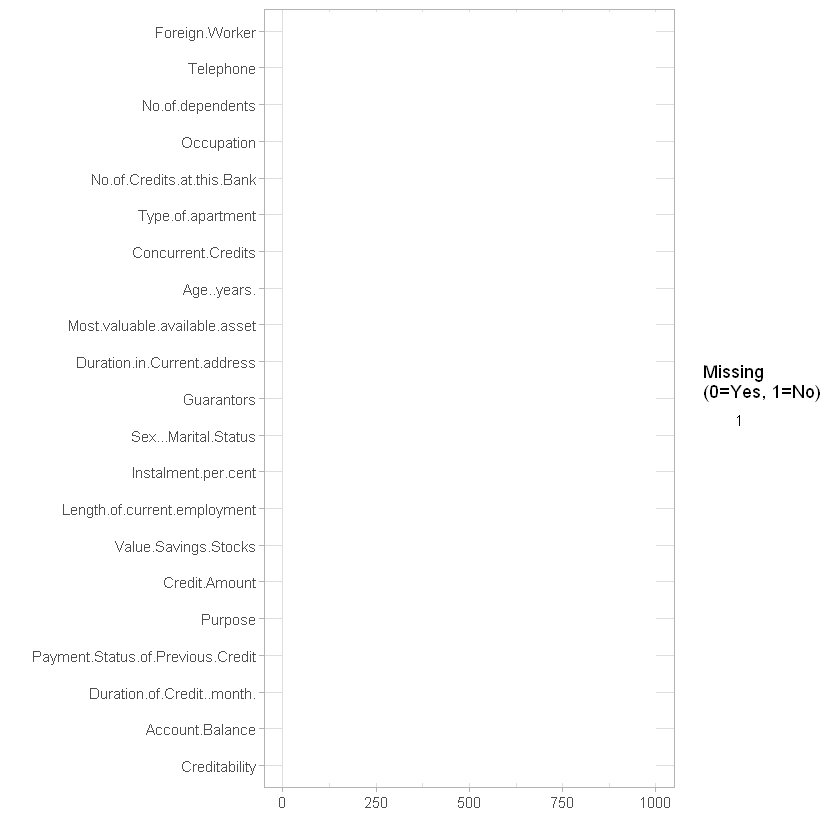

In [149]:
library(ggplot2)

plot_Missing <- function(data_in, title = NULL){
  temp_df <- as.data.frame(ifelse(is.na(data_in), 0, 1))
  temp_df <- temp_df[,order(colSums(temp_df))]
  data_temp <- expand.grid(list(x = 1:nrow(temp_df), y = colnames(temp_df)))
  data_temp$m <- as.vector(as.matrix(temp_df))
  data_temp <- data.frame(x = unlist(data_temp$x), y = unlist(data_temp$y), m = unlist(data_temp$m))
  ggplot(data_temp) + geom_tile(aes(x=x, y=y, fill=factor(m))) + scale_fill_manual(values=c("white", "black"), name="Missing\n(0=Yes, 1=No)") + theme_light() + ylab("") + xlab("") + ggtitle(title)
}


plot_Missing(df_all[,colSums(is.na(df_all)) >= 0])

#### Dimension Reduction using Variable Clustering

The main idea is to reduce the number of columns to a subset of  variables which are the most relevant to predict the target.

In [150]:
catList

[1] "Creditability"                     "Account.Balance"                  
 [3] "Payment.Status.of.Previous.Credit" "Purpose"                          
 [5] "Value.Savings.Stocks"              "Length.of.current.employment"     
 [7] "Instalment.per.cent"               "Sex...Marital.Status"             
 [9] "Guarantors"                        "Duration.in.Current.address"      
[11] "Most.valuable.available.asset"     "Concurrent.Credits"               
[13] "Type.of.apartment"                 "No.of.Credits.at.this.Bank"       
[15] "Occupation"                        "No.of.dependents"                 
[17] "Telephone"                         "Foreign.Worker"

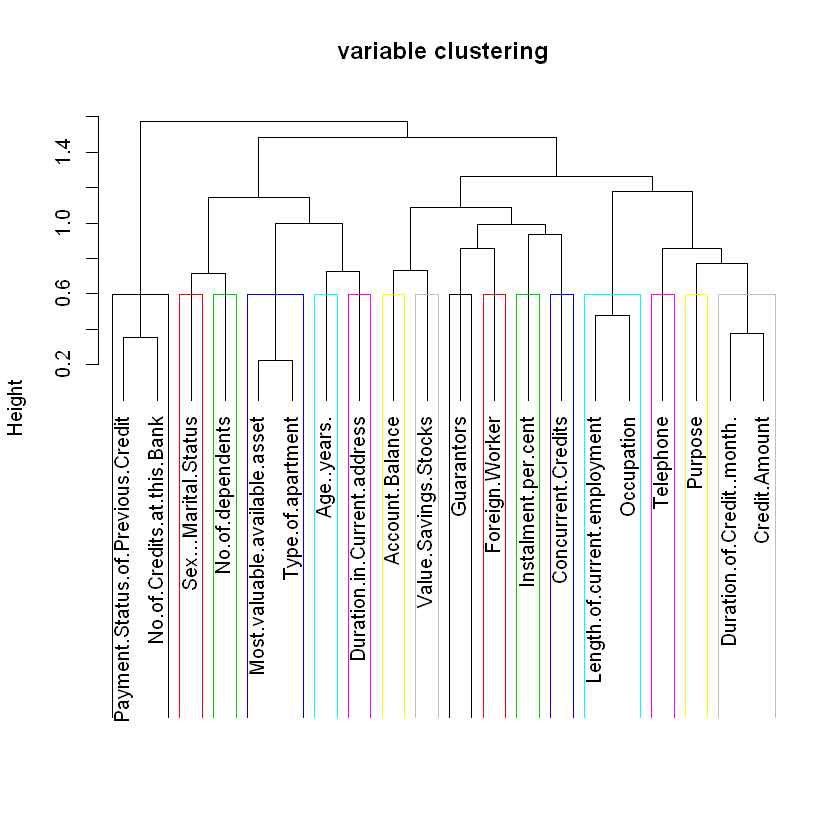

In [151]:
library(ClustOfVar)

tree <- hclustvar(X.quanti=df_all[,countList], X.quali=df_all[,catList[-1]])

plot(tree, main="variable clustering")

rect.hclust(tree, k=16,  border = 1:16) #n clusters (tuned)

In [152]:
summary(tree)

         Length Class      Mode     
call       3    -none-     call     
rec       14    -none-     list     
merge     38    -none-     numeric  
height    19    -none-     numeric  
order     20    -none-     numeric  
labels    20    -none-     character
clusmat  400    -none-     numeric  
X.quanti   3    data.frame list     
X.quali   17    data.frame list     

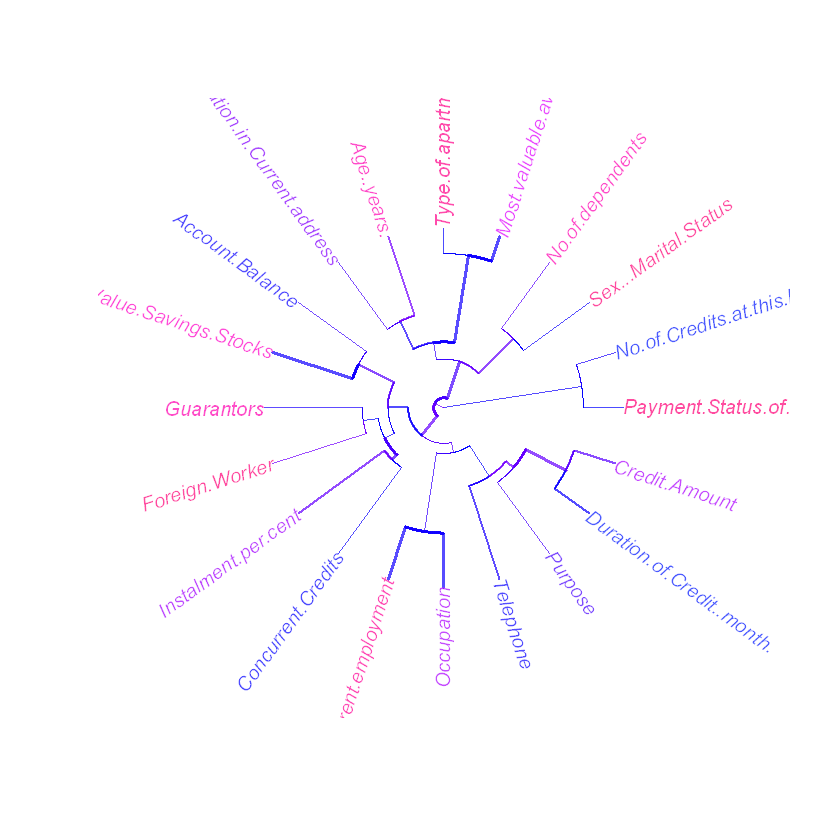

In [153]:
# Phylogenetic trees
library("ape")
plot(as.phylo(tree), type = "fan",
     tip.color = hsv(runif(15, 0.65,  0.95), 1, 1, 0.7),
     edge.color = hsv(runif(10, 0.65, 0.75), 1, 1, 0.7), 
     edge.width = runif(20,  0.5, 3), use.edge.length = TRUE, col = "gray80")

In [154]:

summary.phylo(as.phylo(tree))


Phylogenetic tree: as.phylo(tree) 

  Number of tips: 20 
  Number of nodes: 19 
  Branch lengths:
    mean: 0.2411767 
    variance: 0.02331404 
    distribution summary:
   Min. 1st Qu.  Median 3rd Qu.    Max. 
0.02895 0.11120 0.19310 0.36650 0.61010 
  No root edge.
  First ten tip labels: Duration.of.Credit..month. 
                        Credit.Amount
                        Age..years.
                        Account.Balance
                        Payment.Status.of.Previous.Credit
                        Purpose
                        Value.Savings.Stocks
                        Length.of.current.employment
                        Instalment.per.cent
                        Sex...Marital.Status
  No node labels.


In [155]:
#print n first tip labels
n=15

cat("  First n tip labels:", as.phylo(tree)$tip.label[1], "\n")
cat(paste("                       ", as.phylo(tree)$tip.label[2:n]), sep = "\n")


  First n tip labels: Duration.of.Credit..month. 
                        Credit.Amount
                        Age..years.
                        Account.Balance
                        Payment.Status.of.Previous.Credit
                        Purpose
                        Value.Savings.Stocks
                        Length.of.current.employment
                        Instalment.per.cent
                        Sex...Marital.Status
                        Guarantors
                        Duration.in.Current.address
                        Most.valuable.available.asset
                        Concurrent.Credits
                        Type.of.apartment


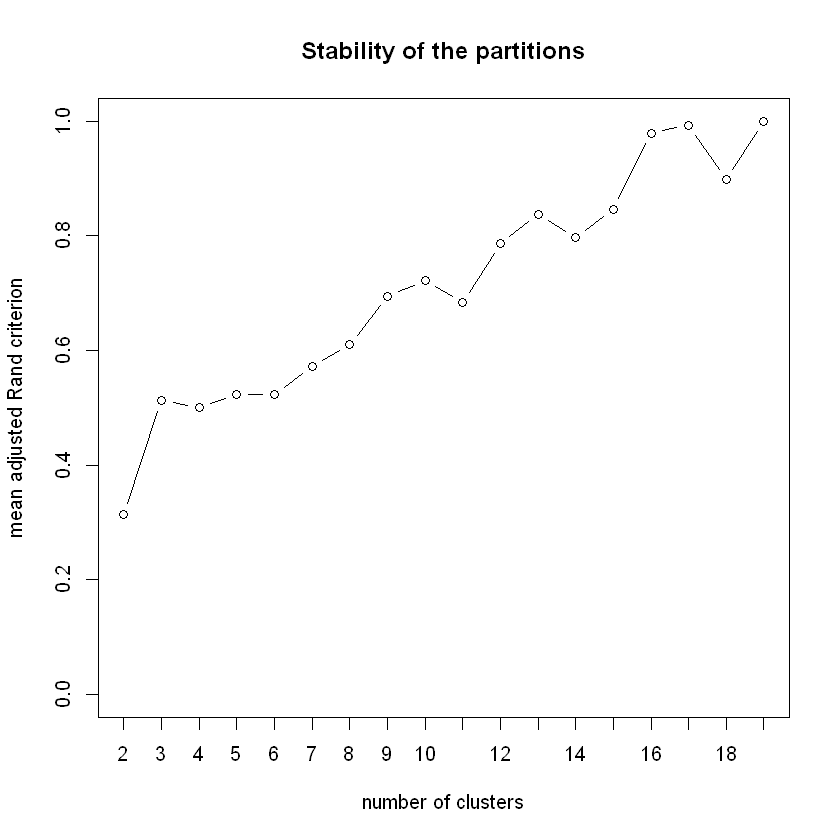

In [156]:
#This graphical representation helps in the determination of a suitable numbers of clusters. 
#? help(stability)

stab<-stability(tree,B=50) # Bootstrap 50 times

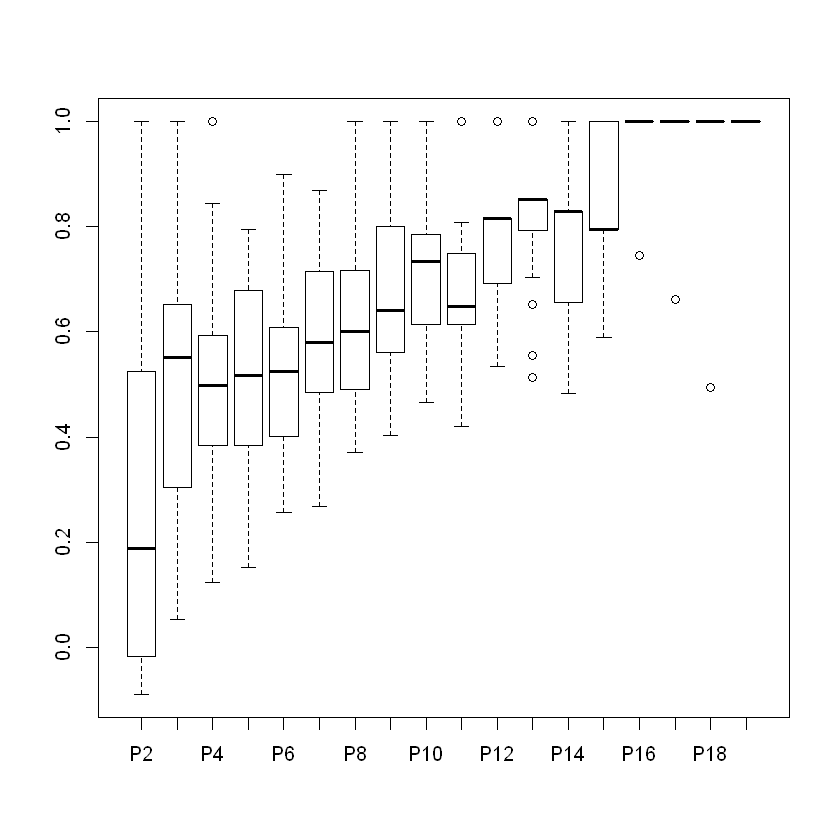

In [157]:
boxplot(stab$matCR)

In [158]:
part<-cutreevar(tree,16)
print(part)


Call:
cutreevar(obj = tree, k = 16)



 name       description                        
 "$var"     "list of variables in each cluster"
 "$sim"     "similarity matrix in each cluster"
 "$cluster" "cluster memberships"              
 "$wss"     "within-cluster sum of squares"    
 "$E"       "gain in cohesion (in %)"          
 "$size"    "size of each cluster"             
 "$scores"  "score of each cluster"            


In [159]:
summary(part)


Call:
cutreevar(obj = tree, k = 16)



Data: 
   number of observations:  1000
   number of  variables:  20
        number of numerical variables:  3
        number of categorical variables:  17
   number of clusters:  16

Cluster  1 : 
                           squared loading
Duration.of.Credit..month.            0.81
Credit.Amount                         0.81


Cluster  2 : 
            squared loading
Age..years.               1


Cluster  3 : 
                squared loading
Account.Balance               1


Cluster  4 : 
                                  squared loading
Payment.Status.of.Previous.Credit            0.82
No.of.Credits.at.this.Bank                   0.82


Cluster  5 : 
        squared loading
Purpose               1


Cluster  6 : 
                     squared loading
Value.Savings.Stocks               1


Cluster  7 : 
                             squared loading
Length.of.current.employment            0.76
Occupation                              0.76


Cluster 

In [160]:
#print n first tip labels
n=16 

cat("  First sixteen tip labels:", as.phylo(tree)$tip.label[1], "\n")
cat(paste("                       ", as.phylo(tree)$tip.label[2:n]), sep = "\n")


  First sixteen tip labels: Duration.of.Credit..month. 
                        Credit.Amount
                        Age..years.
                        Account.Balance
                        Payment.Status.of.Previous.Credit
                        Purpose
                        Value.Savings.Stocks
                        Length.of.current.employment
                        Instalment.per.cent
                        Sex...Marital.Status
                        Guarantors
                        Duration.in.Current.address
                        Most.valuable.available.asset
                        Concurrent.Credits
                        Type.of.apartment
                        No.of.Credits.at.this.Bank


In [161]:

var_list <-    c(as.phylo(tree)$tip.label[1:n]) #tune n wrt to accuracy

In [162]:
df_all <- df_all[,c( 'Creditability', var_list)]


In [163]:
catList <- names(df_all)[which(sapply(df_all, is.factor))]

countList <- names(df_all)[which(sapply(df_all, is.numeric))]

In [164]:
countList


[1] "Duration.of.Credit..month." "Credit.Amount"             
[3] "Age..years."

In [165]:
catList
length(catList)

[1] "Creditability"                     "Account.Balance"                  
 [3] "Payment.Status.of.Previous.Credit" "Purpose"                          
 [5] "Value.Savings.Stocks"              "Length.of.current.employment"     
 [7] "Instalment.per.cent"               "Sex...Marital.Status"             
 [9] "Guarantors"                        "Duration.in.Current.address"      
[11] "Most.valuable.available.asset"     "Concurrent.Credits"               
[13] "Type.of.apartment"                 "No.of.Credits.at.this.Bank"

[1] 14


#### Exploring continuous variables

In [166]:

summary(df_all[, countList])

 Duration.of.Credit..month. Credit.Amount    Age..years.   
 Min.   : 4.0               Min.   :  250   Min.   :19.00  
 1st Qu.:12.0               1st Qu.: 1366   1st Qu.:27.00  
 Median :18.0               Median : 2320   Median :33.00  
 Mean   :20.9               Mean   : 3271   Mean   :35.54  
 3rd Qu.:24.0               3rd Qu.: 3972   3rd Qu.:42.00  
 Max.   :72.0               Max.   :18424   Max.   :75.00  

In [167]:
library(e1071) #skewness
library(gridExtra)



doPlots <- function(data_in, fun, ii, ncol=3) {
  pp <- list()
  for (i in ii) {
    p <- fun(data_in=data_in, i=i)
    pp <- c(pp, list(p))
  }
  do.call("grid.arrange", c(pp, ncol=ncol))
}


plotDen <- function(data_in, i){
  data <- data.frame(x=data_in[[i]], Creditability = data_in$Creditability)
  p <- ggplot(data= data) + geom_line(aes(x = x), stat = 'density', size = 1,alpha = 1.0) +
    xlab(paste0((colnames(data_in)[i]), '\n', 'Skewness: ',round(skewness(data_in[[i]], na.rm = TRUE), 2))) + theme_light() 
  return(p)
   
}

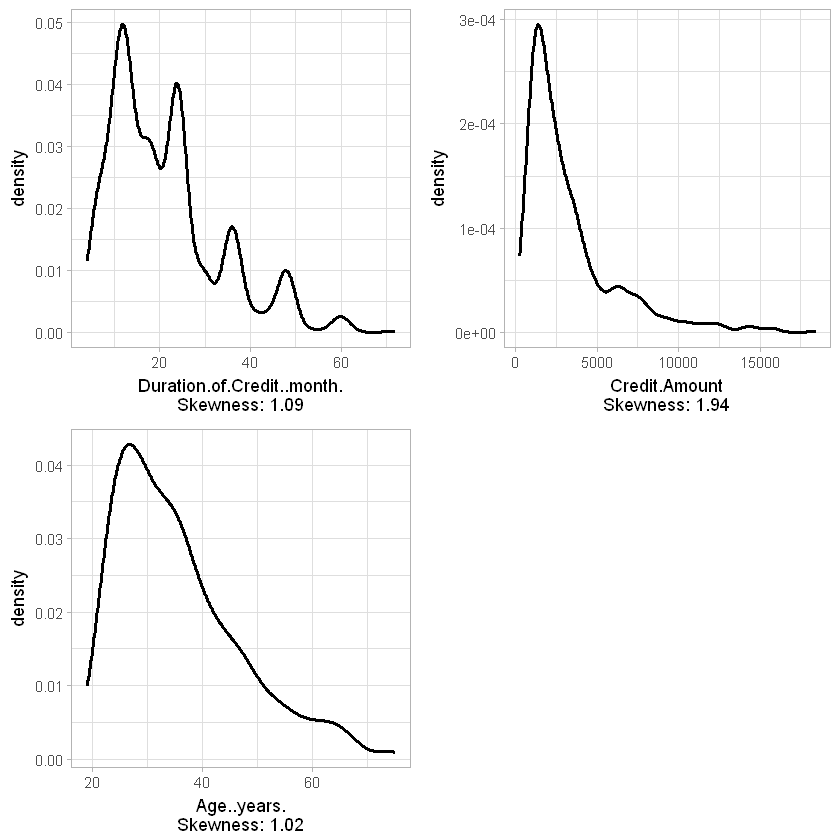

In [168]:
doPlots(df_all[, c(countList, 'Creditability')], fun = plotDen, ii = 1:length(countList), ncol = 2)




Density plots of the features indicates that some of the features are skewed. 

In [169]:
summary(df_all[, countList])

 Duration.of.Credit..month. Credit.Amount    Age..years.   
 Min.   : 4.0               Min.   :  250   Min.   :19.00  
 1st Qu.:12.0               1st Qu.: 1366   1st Qu.:27.00  
 Median :18.0               Median : 2320   Median :33.00  
 Mean   :20.9               Mean   : 3271   Mean   :35.54  
 3rd Qu.:24.0               3rd Qu.: 3972   3rd Qu.:42.00  
 Max.   :72.0               Max.   :18424   Max.   :75.00  

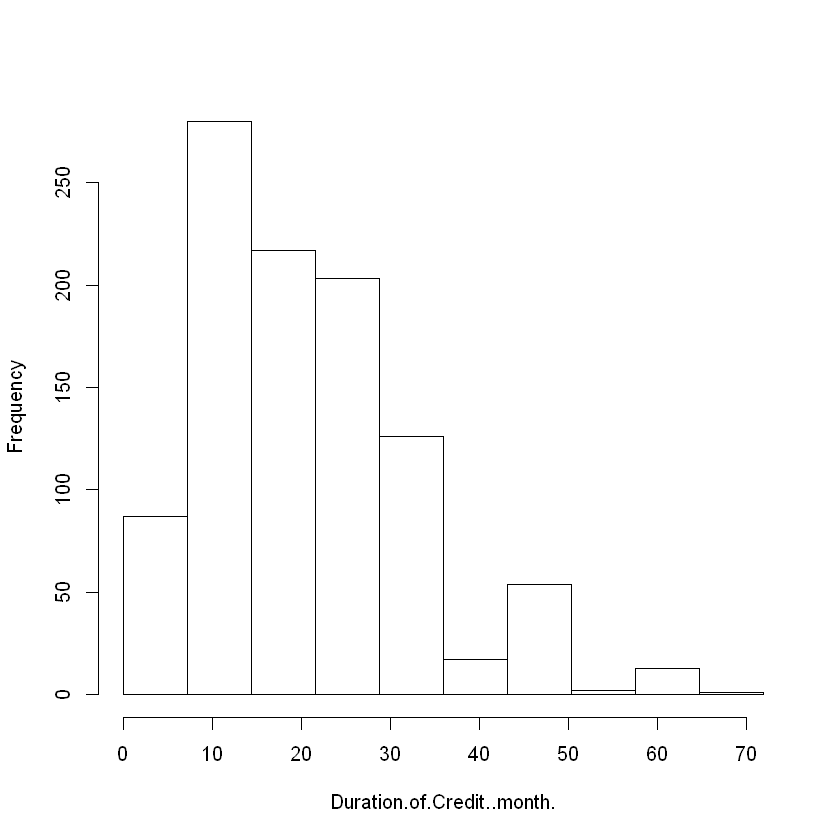

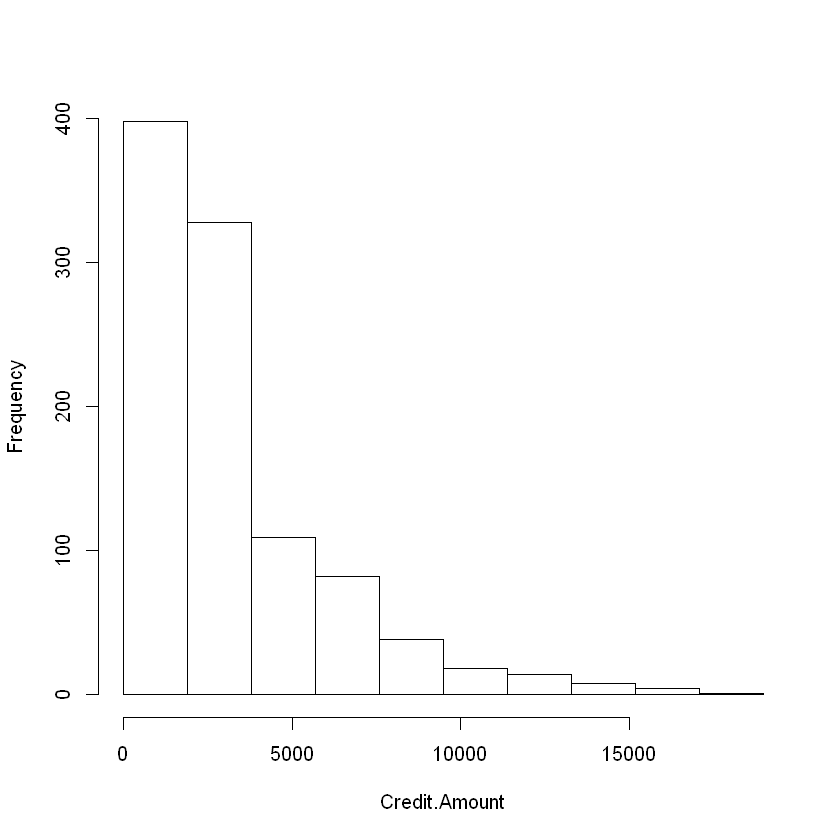

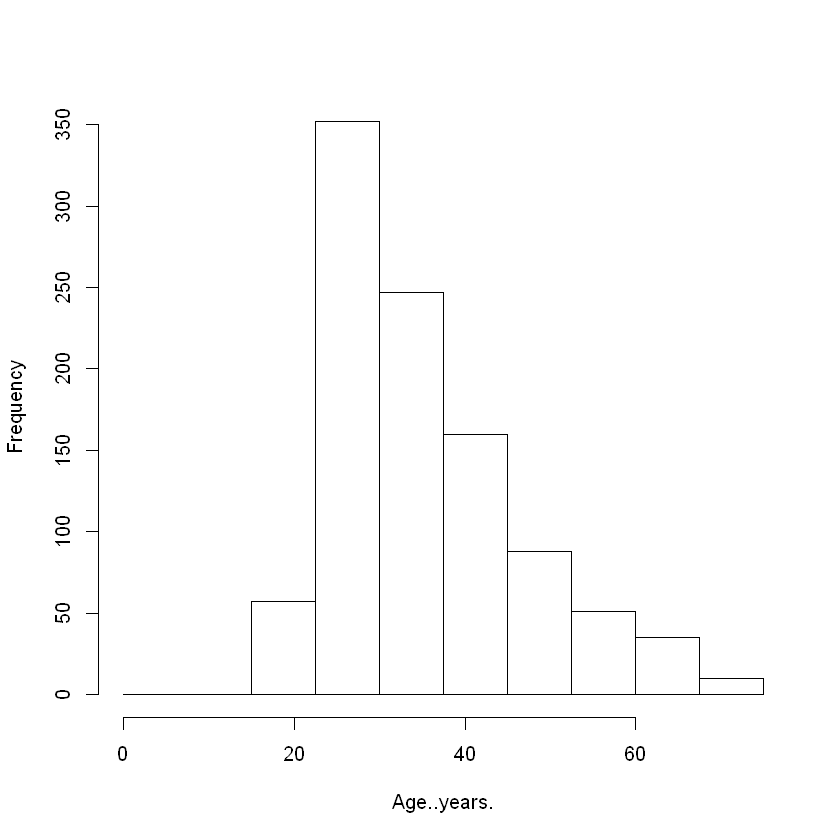

In [170]:
#HISTOGRAMS


brksDf <- seq(0, 72, 7.2)
hist(df_all$Duration.of.Credit..month., breaks=brksDf, xlab = "Duration.of.Credit..month.", ylab = "Frequency", main = " ", cex=0.4)

brksDf <- seq(0, 19000, 1900)
hist(df_all$Credit.Amount, breaks=brksDf, xlab = "Credit.Amount", ylab = "Frequency", main = " ", cex=0.4)

brksDf <- seq(0, 75 , 7.5)
hist(df_all$Age..years., breaks=brksDf, xlab = "Age..years.", ylab = "Frequency", main = " ", cex=0.4)

In [171]:


plotDenlog1p <- function(data_in, i){
  data <- data.frame(x=log1p(data_in[[i]]), Creditability = data_in$Creditability)
  p <- ggplot(data= data) + geom_line(aes(x = x), stat = 'density', size = 1,alpha = 1.0) +
    xlab(paste0((colnames(data_in)[i]), '\n', 'Skewness: ',round(skewness(log1p(data_in[[i]]), na.rm = TRUE), 2))) + theme_light() 
  return(p)
   
}

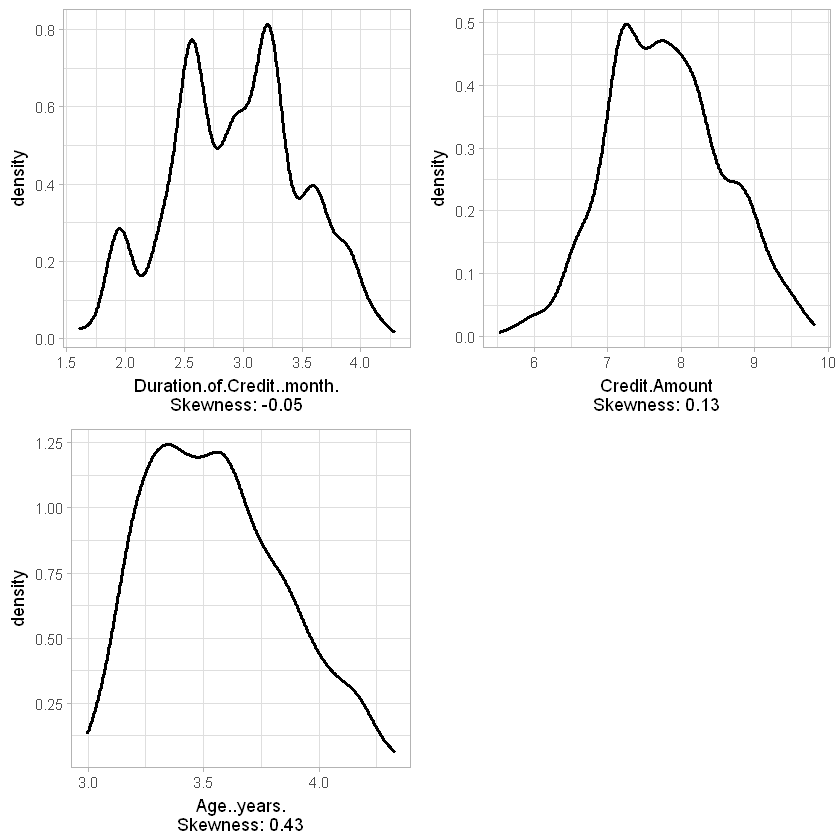

In [172]:
doPlots(df_all[, c(countList, 'Creditability')], fun = plotDenlog1p, ii = 1:length(countList), ncol = 2)


In [173]:
plotDensqr <- function(data_in, i){
  data <- data.frame(x=sqrt(data_in[[i]]), Creditability = data_in$Creditability)
  p <- ggplot(data= data) + geom_line(aes(x = x), stat = 'density', size = 1,alpha = 1.0) +
    xlab(paste0((colnames(data_in)[i]), '\n', 'Skewness: ',round(skewness(sqrt(data_in[[i]]), na.rm = TRUE), 2))) + theme_light() 
  return(p)
   
}

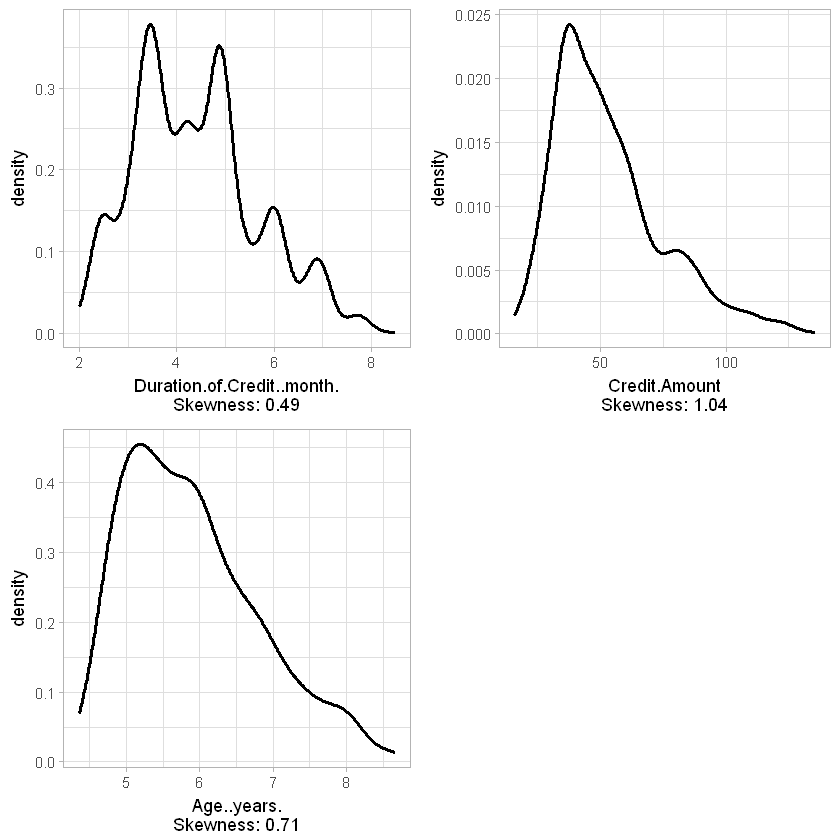

In [174]:


doPlots(df_all[, c(countList, 'Creditability')], fun = plotDensqr, ii = 1:length(countList), ncol = 2)


Therefore taking the logarithm works well for credit.amount, age..years, duration..credithmonts

In [175]:
df_all$Credit.Amount <- log1p(df_all$Credit.Amount)
df_all$Age..years. <- log1p(df_all$Age..years.)
df_all$Duration.of.Credit..month. <- log1p(df_all$Duration.of.Credit..month.)

Plotting numeric features against each other

In [176]:
countList

[1] "Duration.of.Credit..month." "Credit.Amount"             
[3] "Age..years."

In [177]:
max(df_all$Credit.Amount)

[1] 9.821464

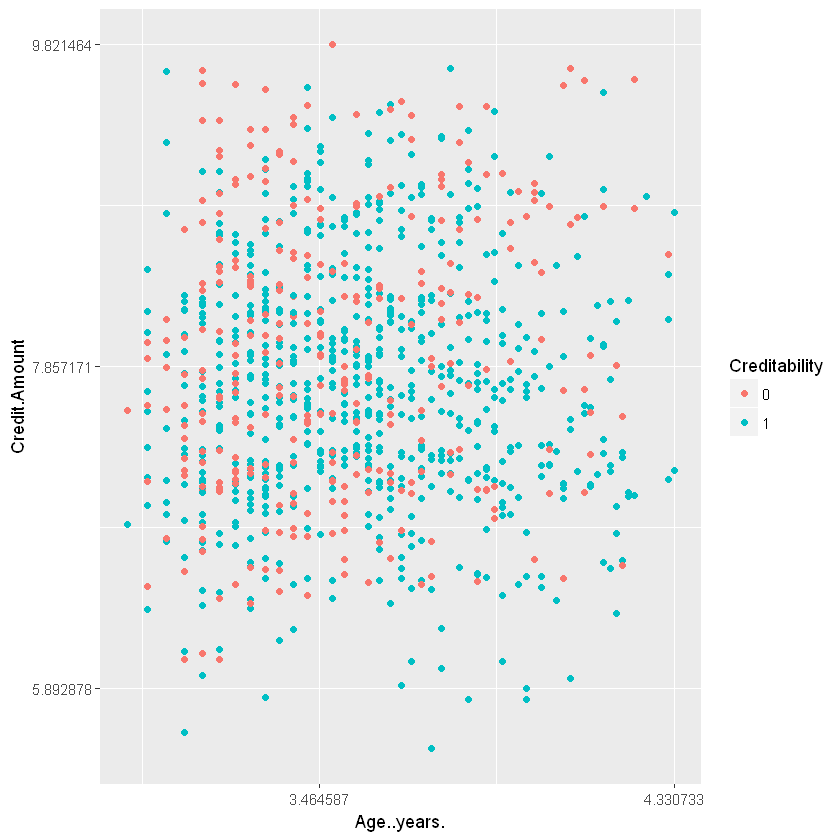

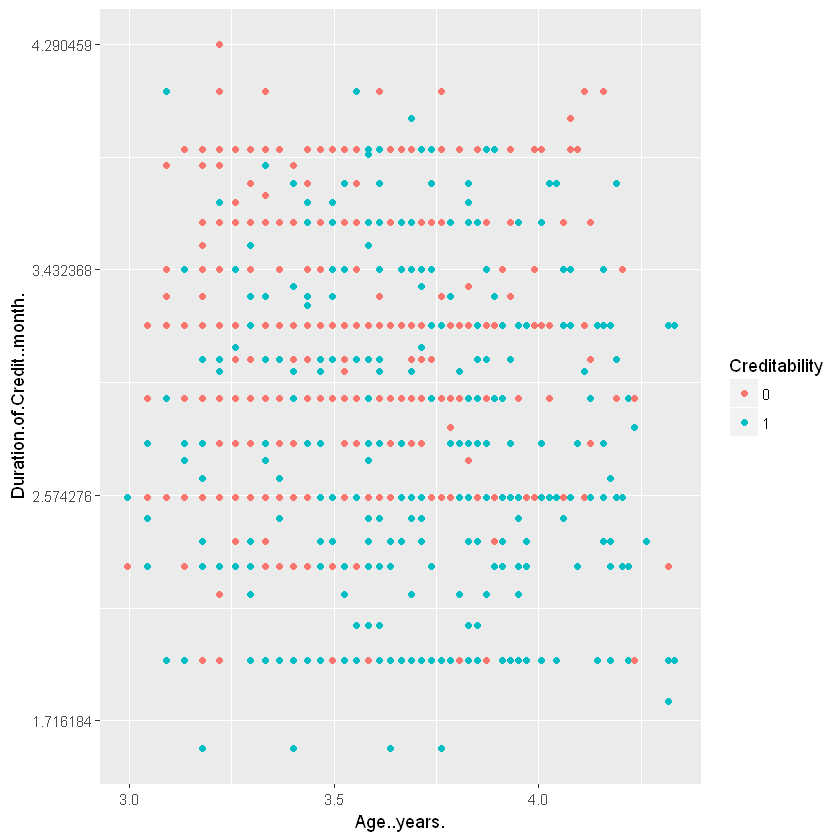

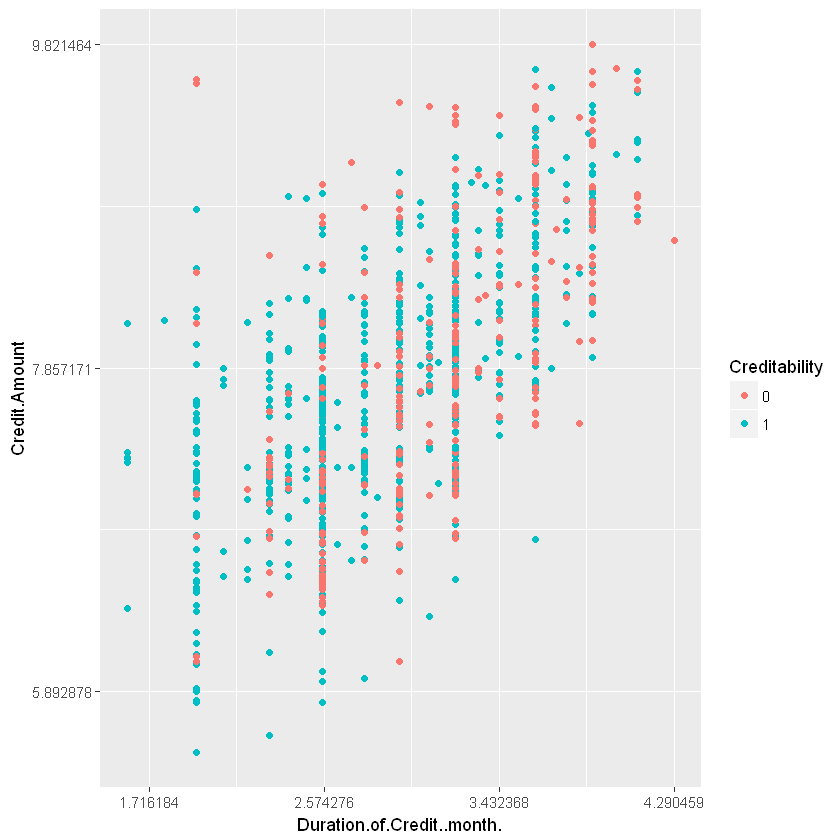

In [178]:

#Scatter plots

ggplot(data=df_all,aes(x = Age..years., y=Credit.Amount))+
geom_point(aes(colour=Creditability))+
scale_y_continuous("Credit.Amount", breaks = seq(0,max(df_all$Credit.Amount)+ max(df_all$Credit.Amount)/10, max(df_all$Credit.Amount)/5))+
scale_x_continuous("Age..years.", breaks = seq(0,max(df_all$Age..years.)+ max(df_all$Age..years.)/10, max(df_all$Age..years.)/5))


ggplot(data=df_all,aes(x = Age..years., y=Duration.of.Credit..month.))+
geom_point(aes(colour=Creditability))+
scale_y_continuous("Duration.of.Credit..month.", breaks = seq(0,max(df_all$Duration.of.Credit..month.)+
                                                              max(df_all$Duration.of.Credit..month.)/10, 
                                                              max(df_all$Duration.of.Credit..month.)/5))





ggplot(data=df_all,aes(x = Duration.of.Credit..month., y=Credit.Amount))+
geom_point(aes(colour=Creditability))+
scale_y_continuous("Credit.Amount", breaks = seq(0,max(df_all$Credit.Amount)+ max(df_all$Credit.Amount)/10, 
                                               max(df_all$Credit.Amount)/5))+
scale_x_continuous("Duration.of.Credit..month.", breaks = seq(0,max(df_all$Duration.of.Credit..month.)+ 
                                                              max(df_all$Duration.of.Credit..month.)/10, 
                                                              max(df_all$Duration.of.Credit..month.)/5))

In [179]:
#among numeric values we examined the one which are correlated

library(caret)

#set threshold as 0.7
ax <-findCorrelation(x = cor(df_all[,countList]), cutoff = 0.7)



In [180]:
ax

integer(0)

In [181]:
names(df_all[,countList])[ax] 

character(0)

No correlation was found among numeric features

#### Similarly, we can visualize our categorical variables as well.

In [182]:

catList

[1] "Creditability"                     "Account.Balance"                  
 [3] "Payment.Status.of.Previous.Credit" "Purpose"                          
 [5] "Value.Savings.Stocks"              "Length.of.current.employment"     
 [7] "Instalment.per.cent"               "Sex...Marital.Status"             
 [9] "Guarantors"                        "Duration.in.Current.address"      
[11] "Most.valuable.available.asset"     "Concurrent.Credits"               
[13] "Type.of.apartment"                 "No.of.Credits.at.this.Bank"

In [183]:
#dodged bar chart
all_bar <- function(i){
 
 #title <- paste("count of ", i)
    
 ggplot(df_all,aes(x=i,fill=Creditability))+
    geom_bar(position = "dodge",  color="black")+
    scale_fill_brewer(palette = "Pastel1") +
    theme(axis.text.x =element_text(angle  = 60,hjust = 1,size=10))#+ 
    #ggtitle(title) 
    
}

Levels which are not so frequent have less chances to appear in the test set, therefore, they should  be merged

The values are merged here according to the levels explanation which can be found here  (<a href="https://onlinecourses.science.psu.edu/stat857/node/222">Data Description</a>)

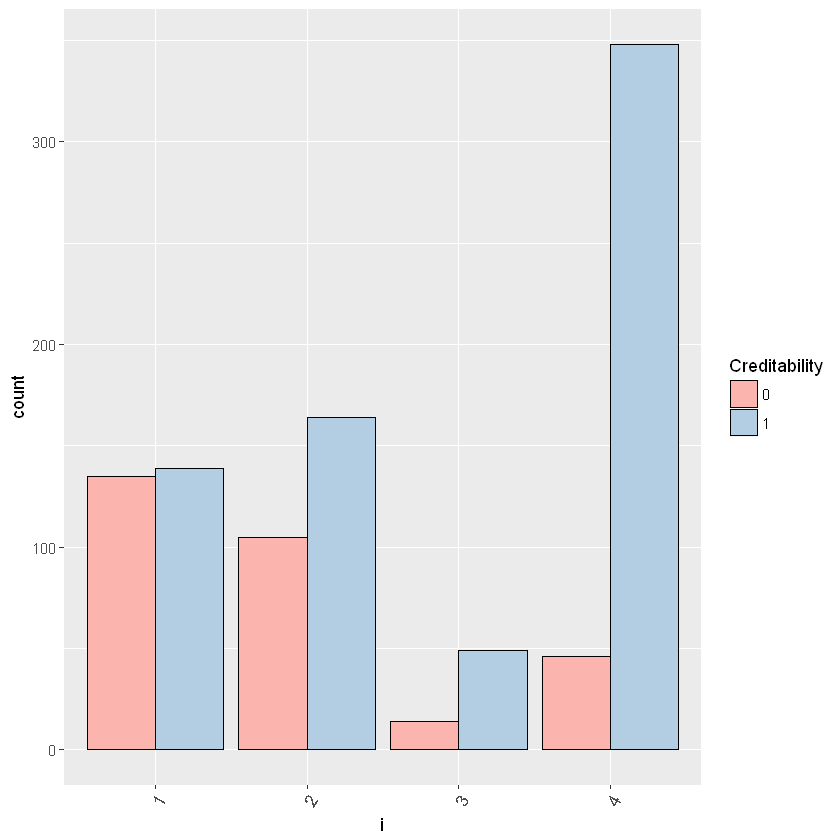

In [184]:

all_bar(df_all$Account.Balance)

In [185]:


library(plyr)

df_all$Account.Balance <- revalue(df_all$Account.Balance, c("3"= "4"))


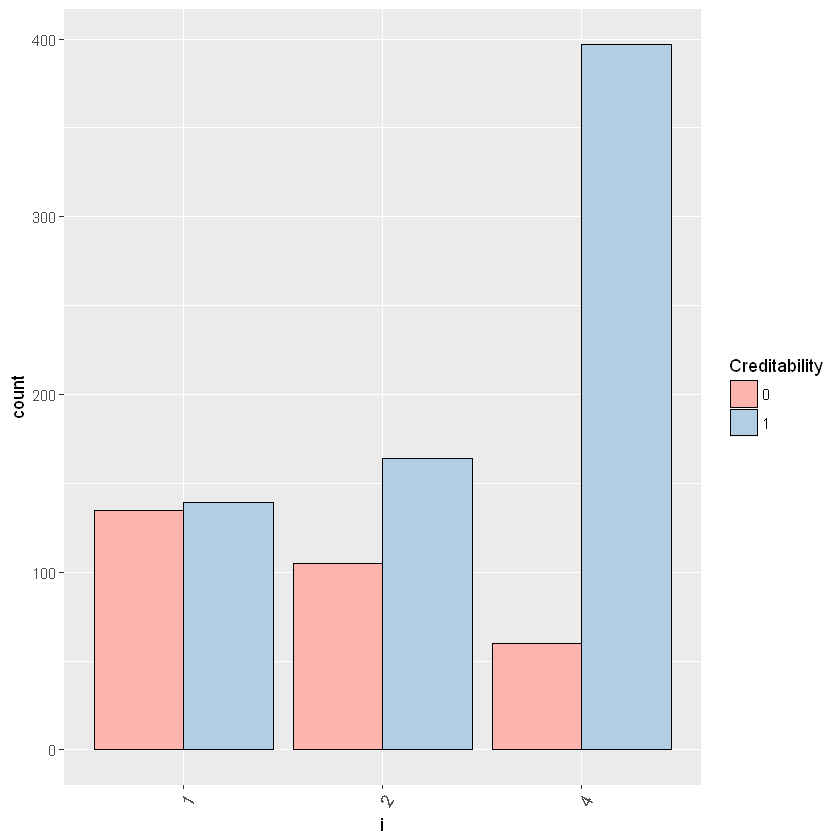

In [186]:
all_bar(df_all$Account.Balance)

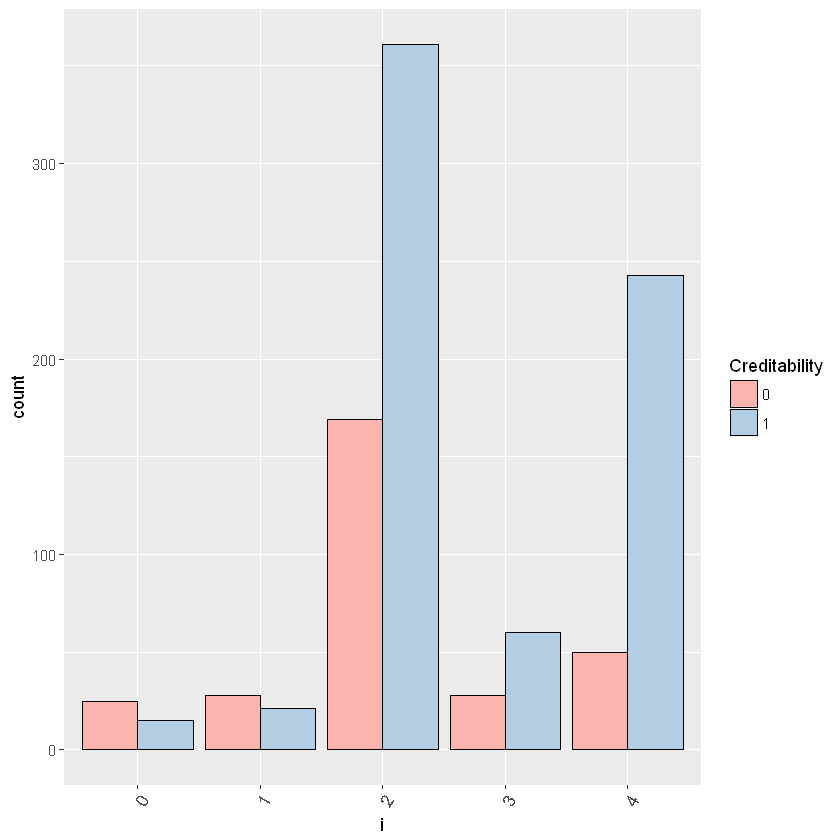

In [187]:


all_bar(df_all$Payment.Status.of.Previous.Credit)

In [188]:


df_all$Payment.Status.of.Previous.Credit<- revalue(df_all$Payment.Status.of.Previous.Credit, c("0"= "2"))

df_all$Payment.Status.of.Previous.Credit<- revalue(df_all$Payment.Status.of.Previous.Credit, c("1"= "2"))

df_all$Payment.Status.of.Previous.Credit<- revalue(df_all$Payment.Status.of.Previous.Credit, c("3"= "4"))


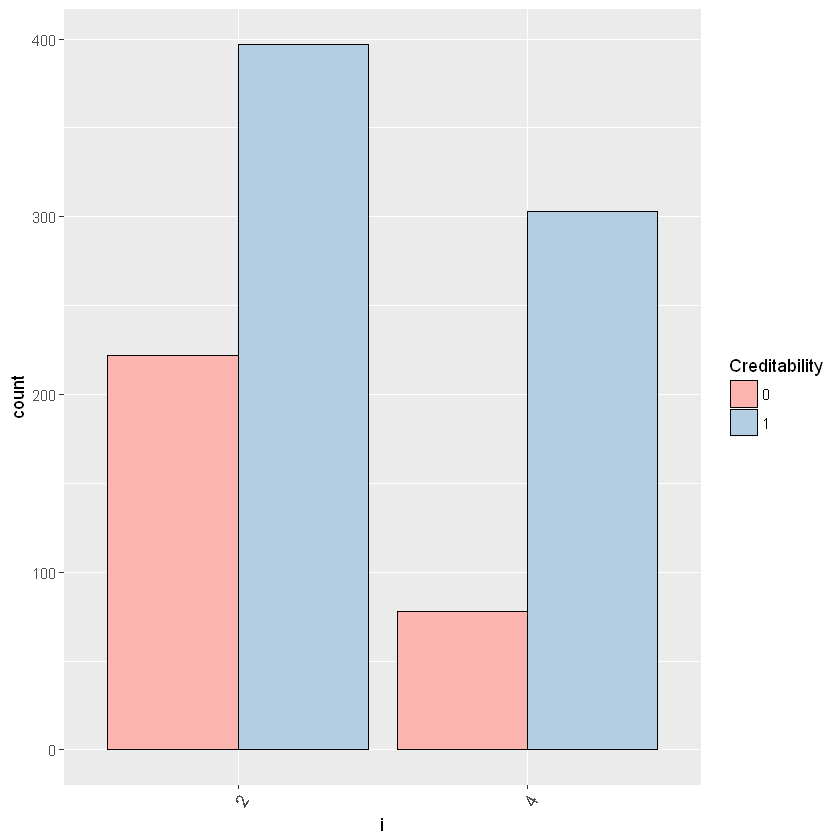

In [189]:

all_bar(df_all$Payment.Status.of.Previous.Credit)

In [190]:
summary(df_all$Payment.Status.of.Previous.Credit)

2   4 
619 381

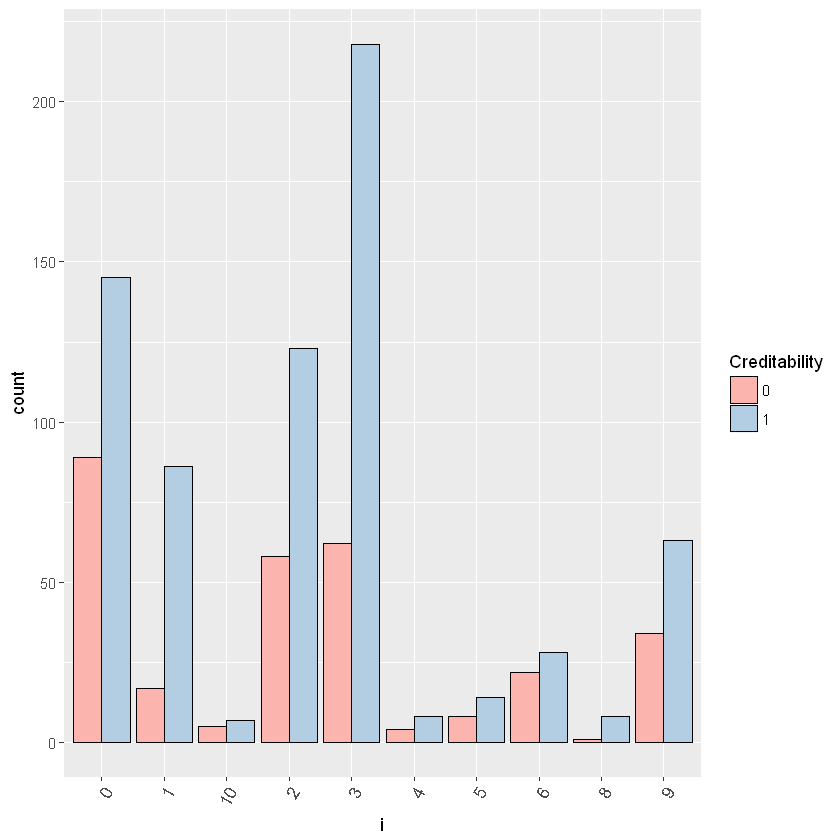

In [191]:
all_bar(df_all$Purpose)

In [192]:



df_all$Purpose<- revalue(df_all$Purpose, c("4"= "11"))

df_all$Purpose<- revalue(df_all$Purpose, c("5"= "11"))


df_all$Purpose<- revalue(df_all$Purpose, c("6"= "11"))

#df_all$Purpose<- revalue(df_all$Purpose, c("7"= "11"))


df_all$Purpose<- revalue(df_all$Purpose, c("8"= "11"))


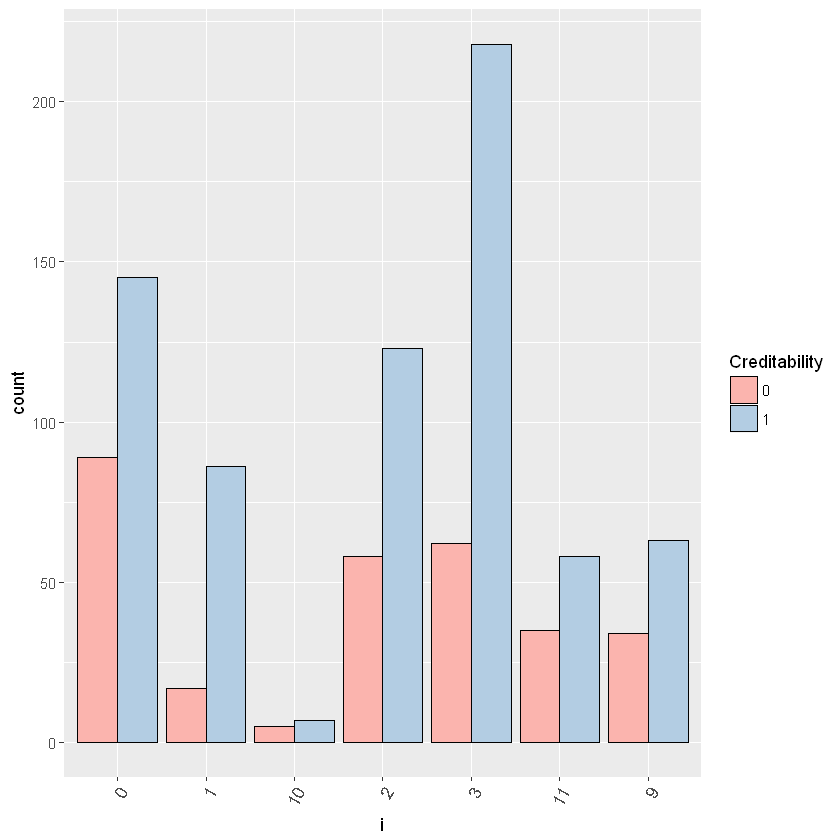

In [193]:
all_bar(df_all$Purpose)

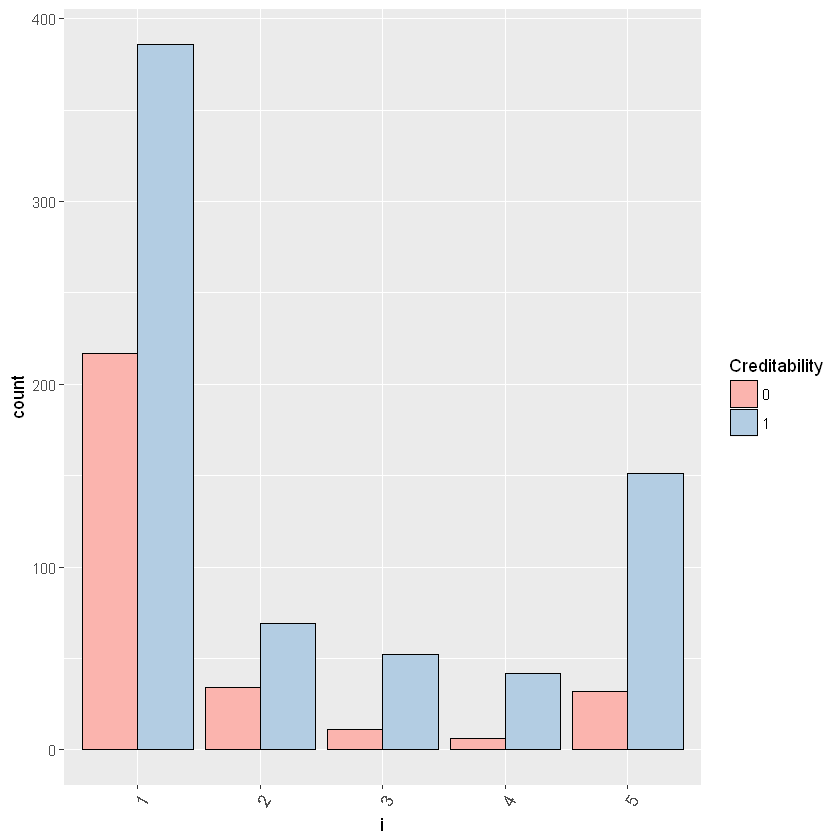

In [194]:
all_bar(df_all$Value.Savings.Stocks)

In [195]:
df_all$Value.Savings.Stocks<- revalue(df_all$Value.Savings.Stocks, c("2"= "3"))

                                    
                                       
df_all$Value.Savings.Stocks<- revalue(df_all$Value.Savings.Stocks, c("4"= "3"))



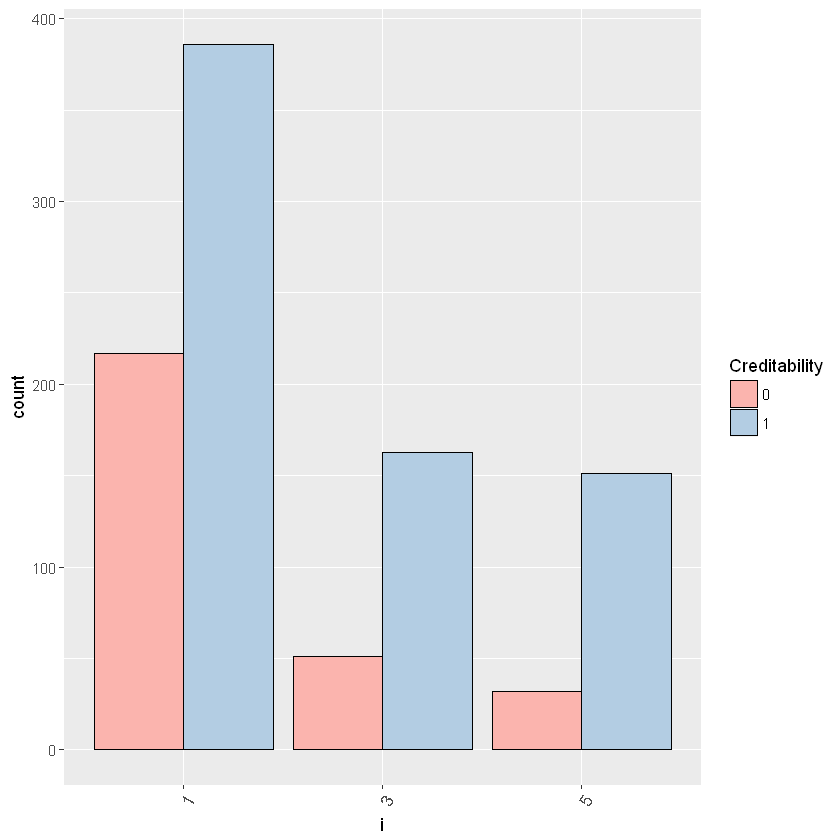

In [196]:
all_bar(df_all$Value.Savings.Stocks)

In [197]:
summary(df_all$Value.Savings.Stocks)

1   3   5 
603 214 183

In [198]:
catList

[1] "Creditability"                     "Account.Balance"                  
 [3] "Payment.Status.of.Previous.Credit" "Purpose"                          
 [5] "Value.Savings.Stocks"              "Length.of.current.employment"     
 [7] "Instalment.per.cent"               "Sex...Marital.Status"             
 [9] "Guarantors"                        "Duration.in.Current.address"      
[11] "Most.valuable.available.asset"     "Concurrent.Credits"               
[13] "Type.of.apartment"                 "No.of.Credits.at.this.Bank"

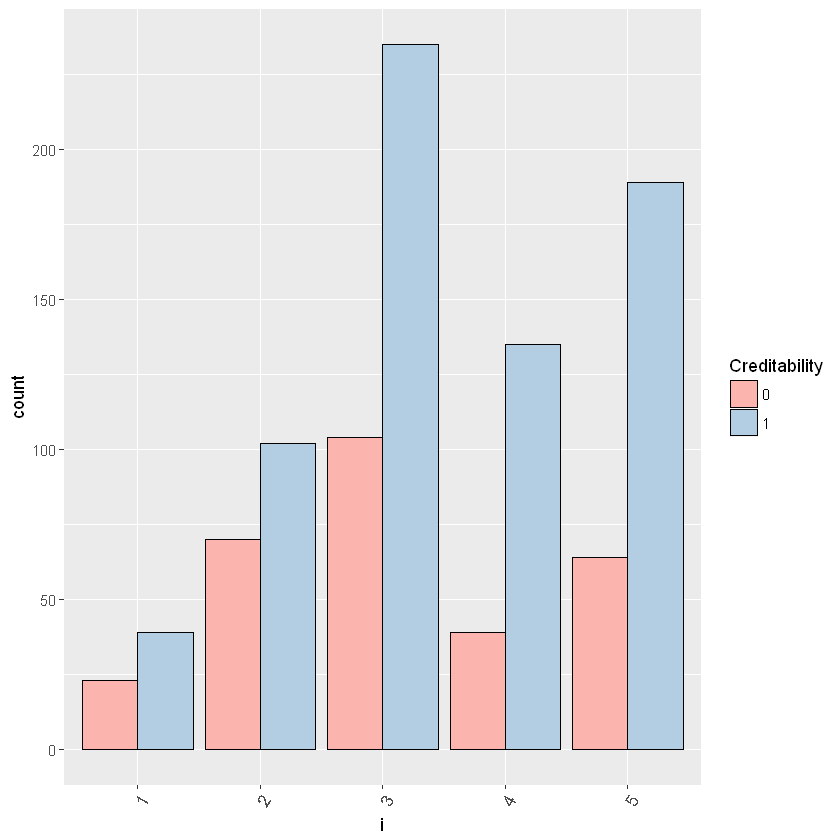

In [199]:

all_bar(df_all$Length.of.current.employment)

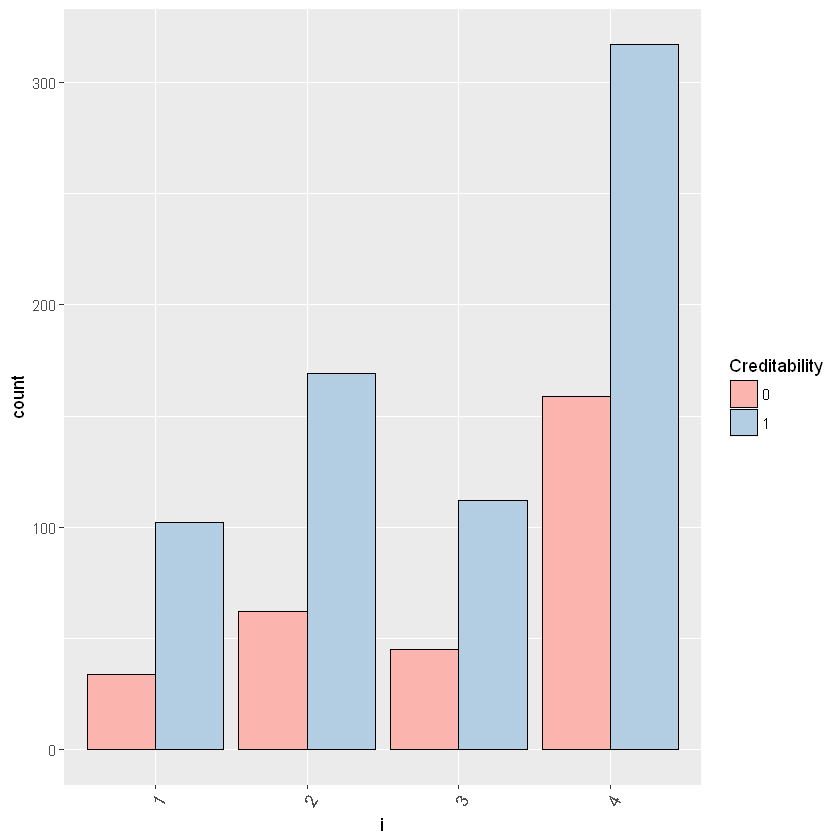

In [200]:

all_bar(df_all$Instalment.per.cent)

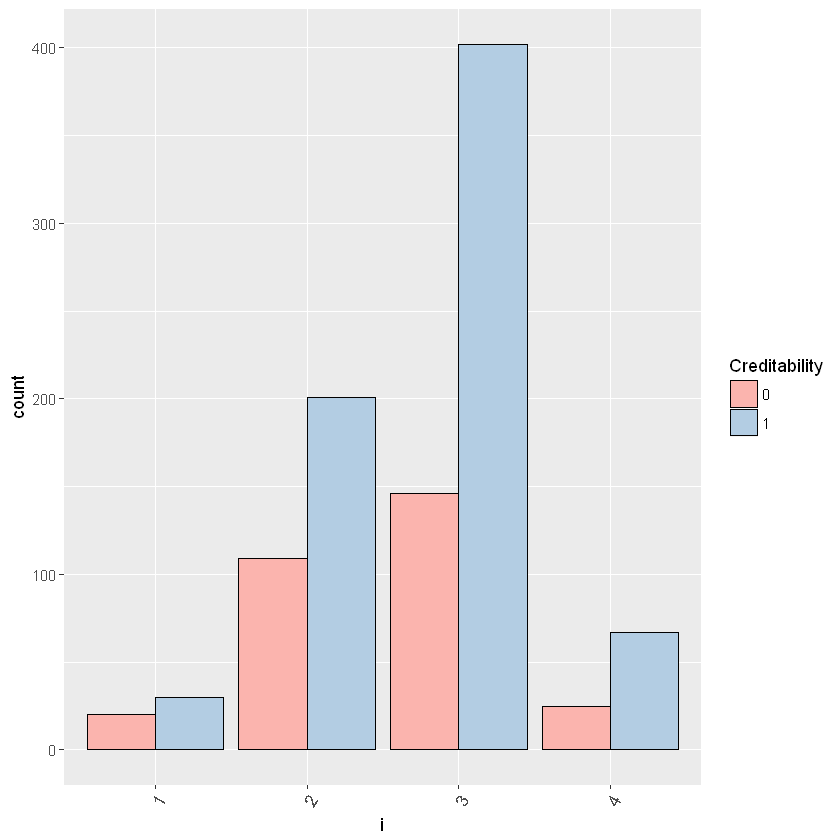

In [201]:

all_bar(df_all$Sex...Marital.Status)

In [202]:
df_all$Sex...Marital.Status <- revalue(df_all$Sex...Marital.Status, c("1"= "2"))


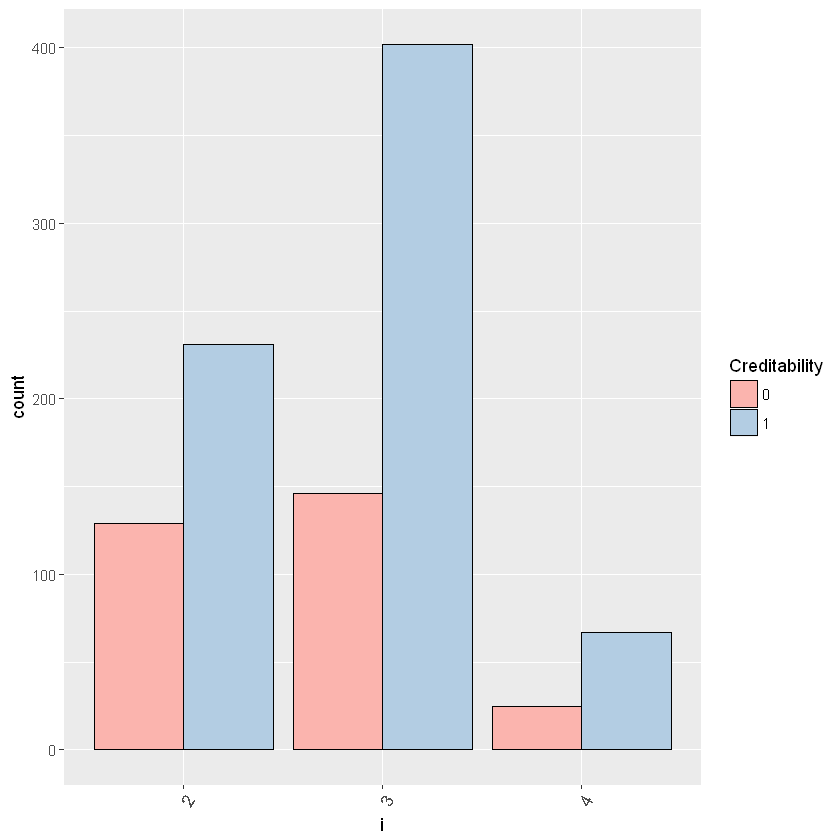

In [203]:
all_bar(df_all$Sex...Marital.Status)

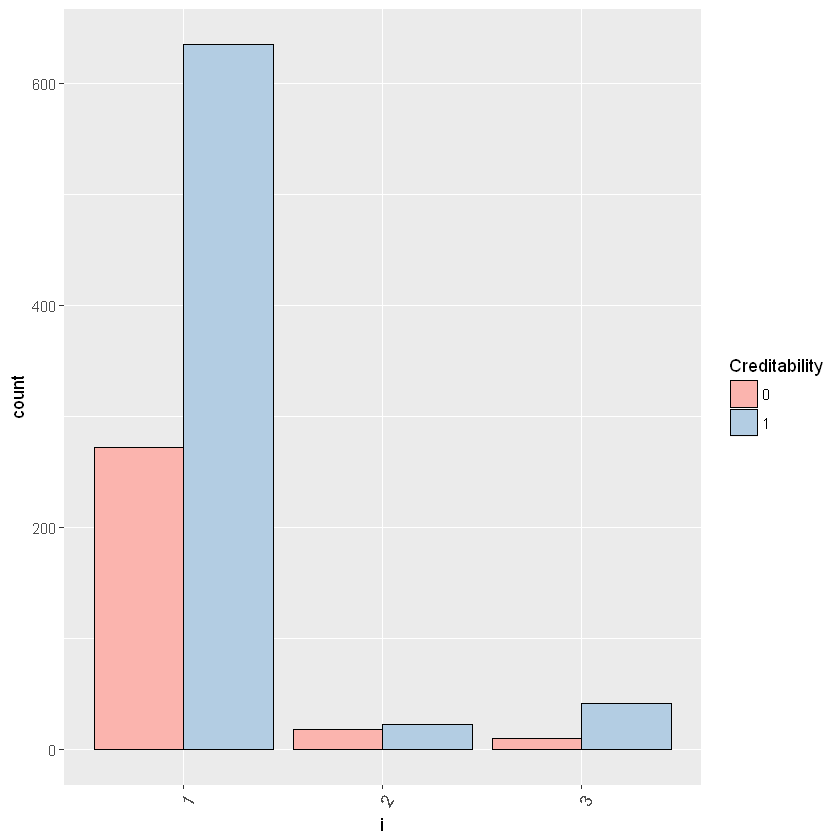

In [204]:
all_bar(df_all$Guarantors)

In [205]:
df_all$Guarantors <- revalue(df_all$Guarantors, c("2"= "3"))


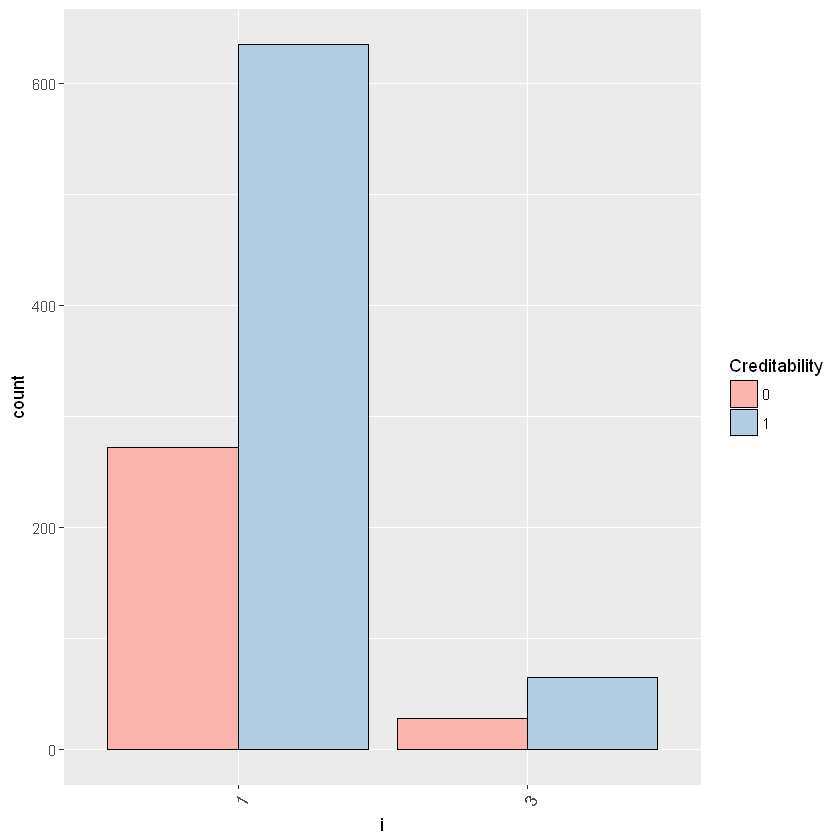

In [206]:
all_bar(df_all$Guarantors)

In [207]:
catList

[1] "Creditability"                     "Account.Balance"                  
 [3] "Payment.Status.of.Previous.Credit" "Purpose"                          
 [5] "Value.Savings.Stocks"              "Length.of.current.employment"     
 [7] "Instalment.per.cent"               "Sex...Marital.Status"             
 [9] "Guarantors"                        "Duration.in.Current.address"      
[11] "Most.valuable.available.asset"     "Concurrent.Credits"               
[13] "Type.of.apartment"                 "No.of.Credits.at.this.Bank"

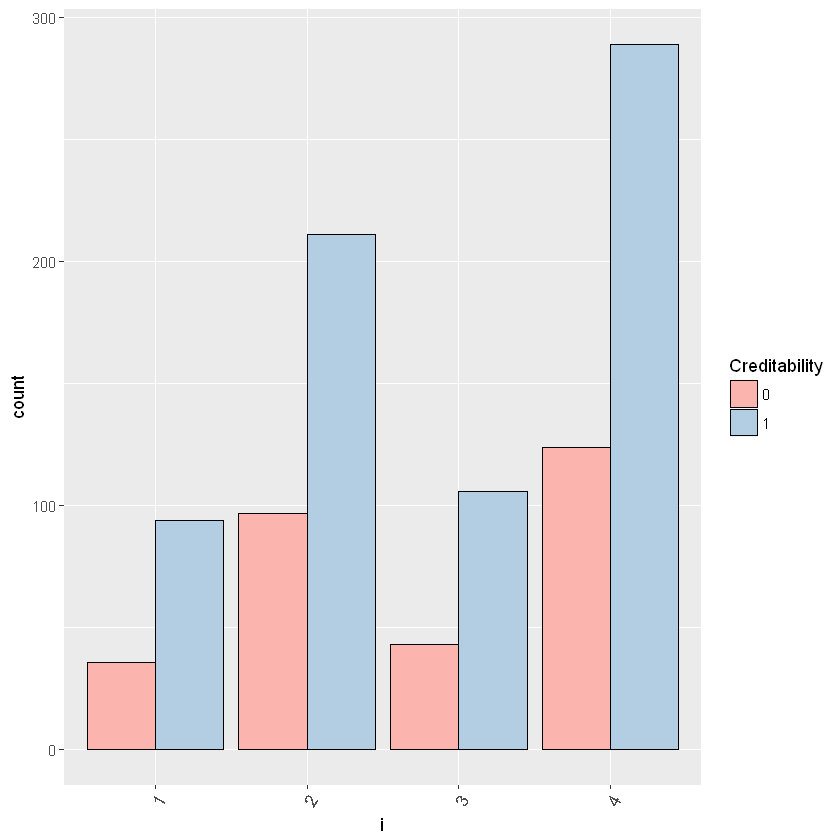

In [208]:
all_bar(df_all$Duration.in.Current.address)

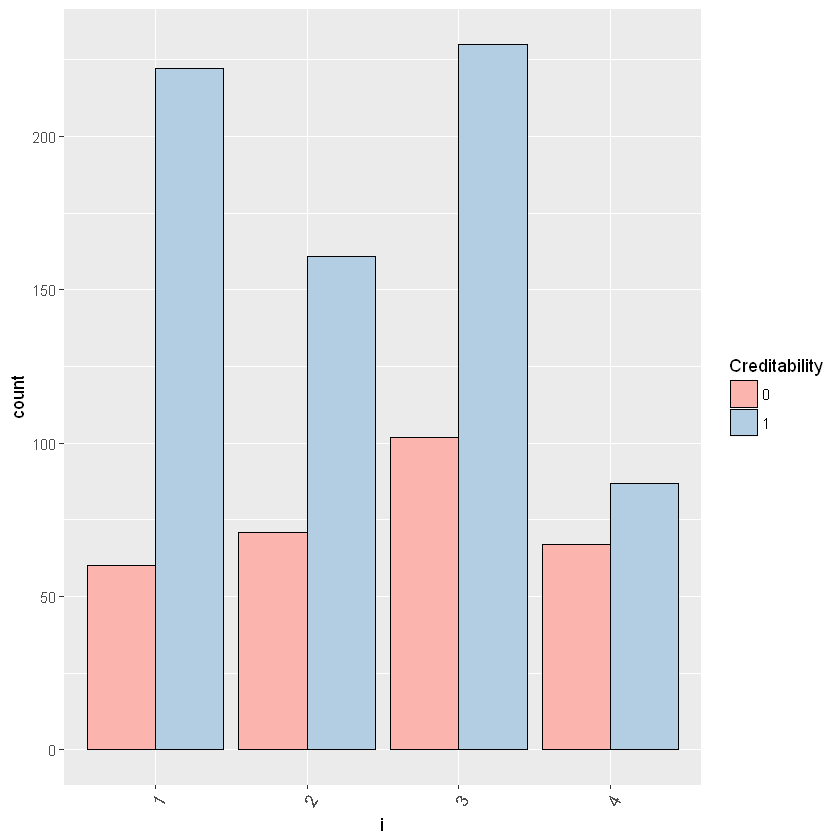

In [209]:
all_bar(df_all$Most.valuable.available.asset)

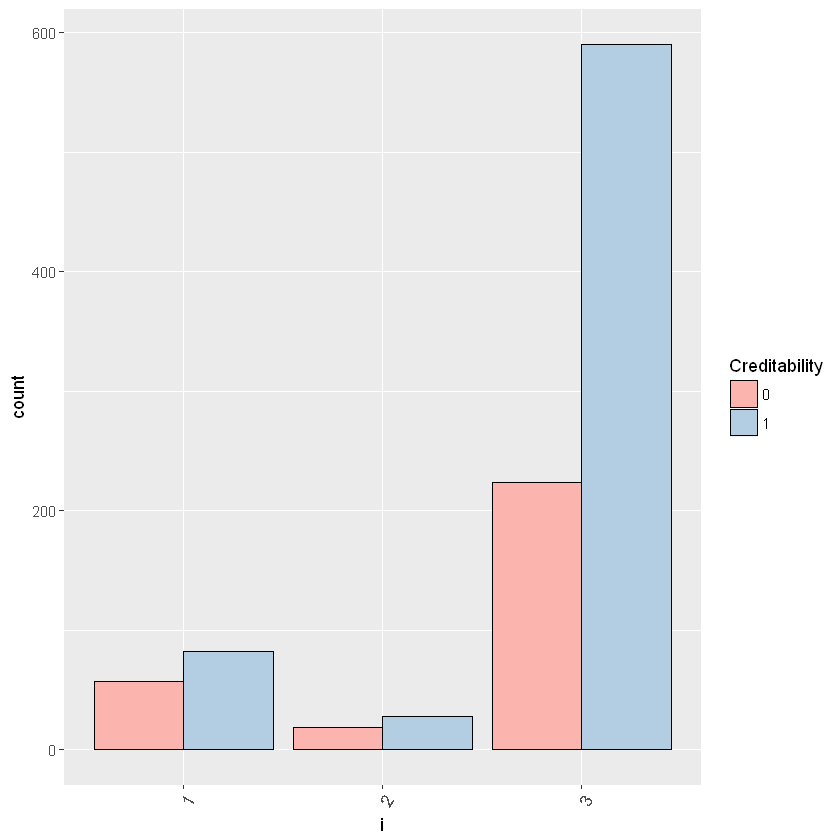

In [210]:
all_bar(df_all$Concurrent.Credits)

In [211]:
df_all$Concurrent.Credits <- revalue(df_all$Concurrent.Credits, c("2"= "1"))


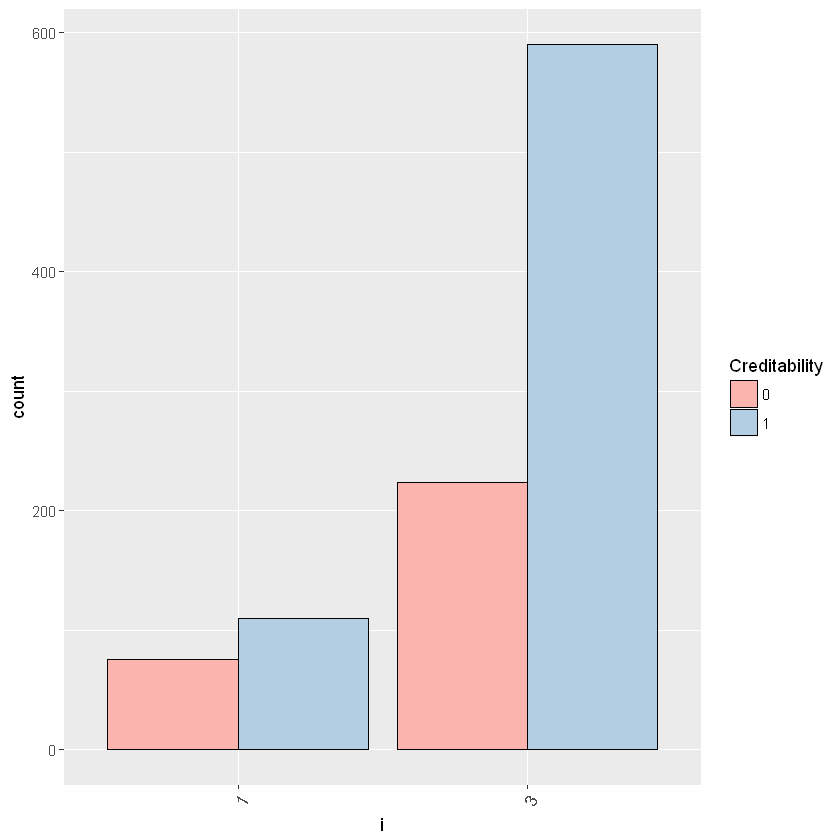

In [212]:
all_bar(df_all$Concurrent.Credits)


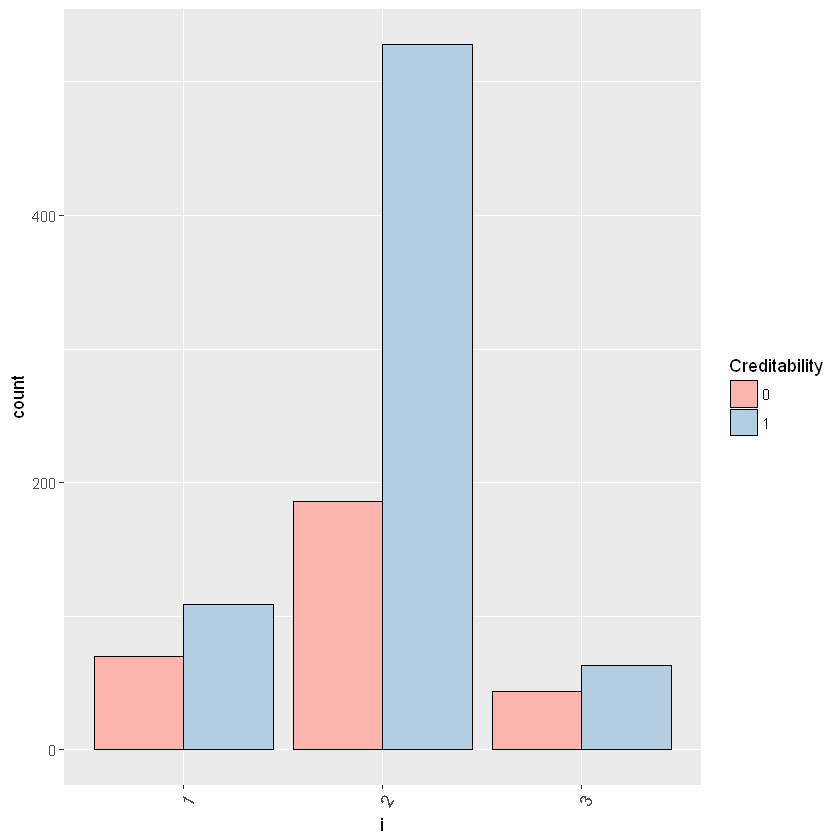

In [213]:
all_bar(df_all$Type.of.apartment)

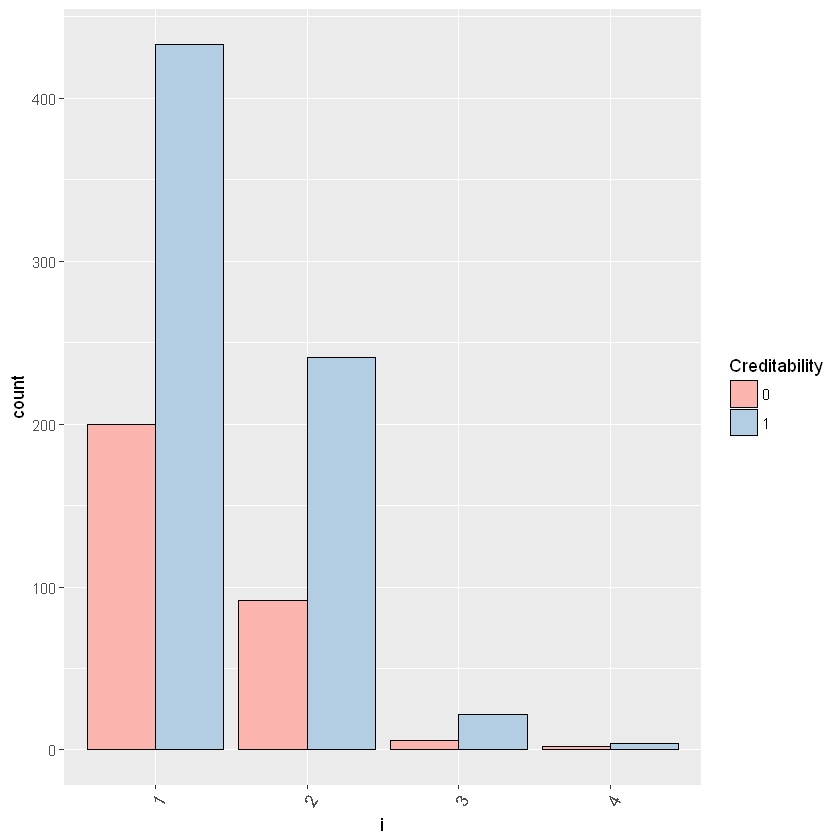

In [214]:
all_bar(df_all$No.of.Credits.at.this.Bank)

In [215]:
df_all$No.of.Credits.at.this.Bank <- revalue(df_all$No.of.Credits.at.this.Bank, c("3"= "4"))


df_all$No.of.Credits.at.this.Bank <- revalue(df_all$No.of.Credits.at.this.Bank, c("2"= "4"))


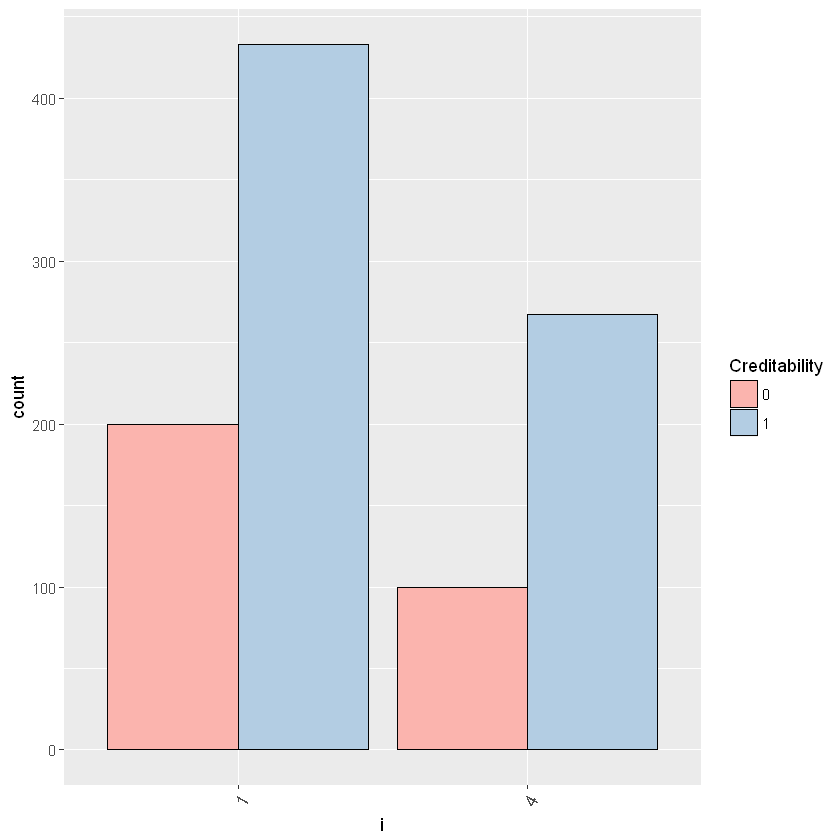

In [216]:
all_bar(df_all$No.of.Credits.at.this.Bank)

In [217]:
catList

[1] "Creditability"                     "Account.Balance"                  
 [3] "Payment.Status.of.Previous.Credit" "Purpose"                          
 [5] "Value.Savings.Stocks"              "Length.of.current.employment"     
 [7] "Instalment.per.cent"               "Sex...Marital.Status"             
 [9] "Guarantors"                        "Duration.in.Current.address"      
[11] "Most.valuable.available.asset"     "Concurrent.Credits"               
[13] "Type.of.apartment"                 "No.of.Credits.at.this.Bank"

In [218]:
str(df_all)

'data.frame':	1000 obs. of  17 variables:
 $ Creditability                    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Duration.of.Credit..month.       : num  2.94 2.3 2.56 2.56 2.56 ...
 $ Credit.Amount                    : num  6.96 7.94 6.74 7.66 7.68 ...
 $ Age..years.                      : num  3.09 3.61 3.18 3.69 3.66 ...
 $ Account.Balance                  : Factor w/ 3 levels "1","2","4": 1 1 2 1 1 1 1 1 3 2 ...
 $ Payment.Status.of.Previous.Credit: Factor w/ 2 levels "2","4": 2 2 1 2 2 2 2 2 2 1 ...
 $ Purpose                          : Factor w/ 7 levels "0","1","10","2",..: 4 1 7 1 1 1 1 1 5 5 ...
 $ Value.Savings.Stocks             : Factor w/ 3 levels "1","3","5": 1 1 2 1 1 1 1 1 1 2 ...
 $ Length.of.current.employment     : Factor w/ 5 levels "1","2","3","4",..: 2 3 4 3 3 2 4 2 1 1 ...
 $ Instalment.per.cent              : Factor w/ 4 levels "1","2","3","4": 4 2 2 3 4 1 1 2 4 1 ...
 $ Sex...Marital.Status             : Factor w/ 3 levels "2","3","4": 1 2 

In [219]:
prop.table(table(df_all$Creditability))




  0   1 
0.3 0.7 

In [220]:
catList

[1] "Creditability"                     "Account.Balance"                  
 [3] "Payment.Status.of.Previous.Credit" "Purpose"                          
 [5] "Value.Savings.Stocks"              "Length.of.current.employment"     
 [7] "Instalment.per.cent"               "Sex...Marital.Status"             
 [9] "Guarantors"                        "Duration.in.Current.address"      
[11] "Most.valuable.available.asset"     "Concurrent.Credits"               
[13] "Type.of.apartment"                 "No.of.Credits.at.this.Bank"

In [221]:

# number of categorical variables
ncat <- length(catList)-1

# create vector to store results
pval.cat <- rep(0, ncat)

#chi-square test and print p-value

for (i in  1: (length(catList)-1)){
    #print(catList[i+1])
    pval.cat[i] <- chisq.test(df_all$Creditability, df_all[,catList[i+1]], simulate.p.value = TRUE)$p.value
    #cat(val$p.value, '\n')
}   


names(pval.cat) <- catList[-1]



# order categorical variables according
# to their dependence of Status
sort(pval.cat)

Account.Balance Payment.Status.of.Previous.Credit 
                     0.0004997501                      0.0004997501 
                          Purpose              Value.Savings.Stocks 
                     0.0004997501                      0.0004997501 
    Most.valuable.available.asset                Concurrent.Credits 
                     0.0004997501                      0.0004997501 
                Type.of.apartment      Length.of.current.employment 
                     0.0004997501                      0.0009995002 
             Sex...Marital.Status               Instalment.per.cent 
                     0.0109945027                      0.1389305347 
       No.of.Credits.at.this.Bank       Duration.in.Current.address 
                     0.1414292854                      0.8705647176 
                       Guarantors 
                     1.0000000000

"Instalment.per.cent", "Duration.in.Current.address", "No.of.Credits.at.this.Bank", "Guarantors" are less important of all?

Same can be done for continuous variables

In [222]:
countList

[1] "Duration.of.Credit..month." "Credit.Amount"             
[3] "Age..years."

In [223]:


ncount <- length(countList)

# create vector to store results
pval.count <- rep(0, ncount)


for (i in  1: length(countList)){
  
    
    pval.count[i] <- oneway.test(df_all[,countList[i]] ~ df_all$Creditability)$p.value
   
}   

names(pval.count) <- countList



# order categorical variables according
# to their dependence of Status
sort(pval.count)

Duration.of.Credit..month.              Credit.Amount 
              5.552394e-12               1.106088e-03 
               Age..years. 
              1.239714e-03

### Building Machine Learning algorithms


Investigate var importance (other method)

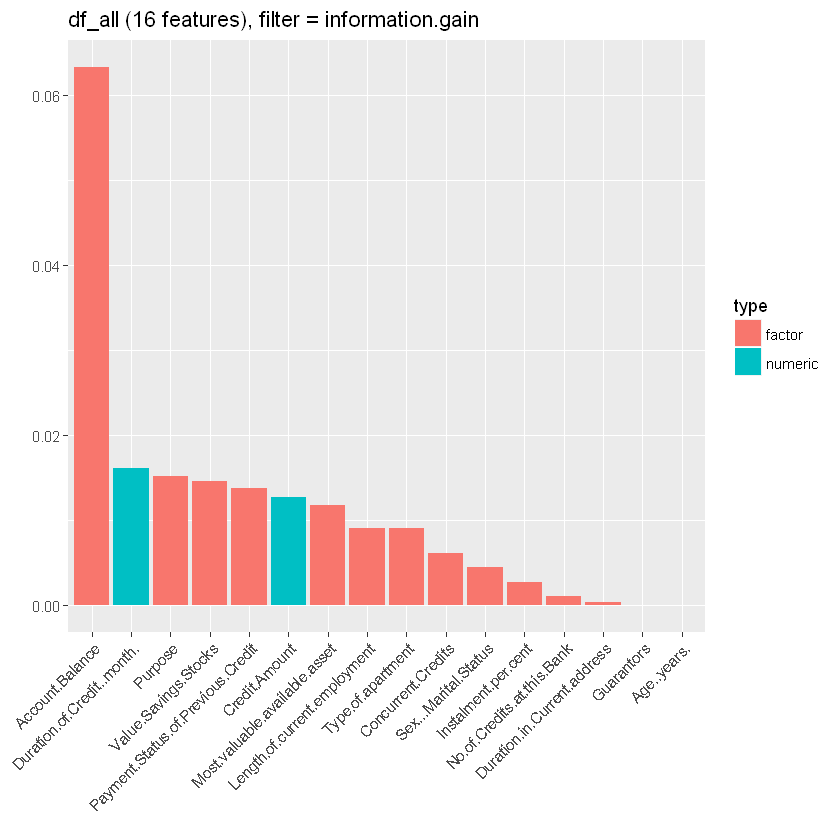

In [224]:
#load library for machine learning
library(mlr)

#create task
task <- makeClassifTask(data = df_all,target = "Creditability")



#remove zero variance features
task <- removeConstantFeatures(task)




#get variable importance chart
var_imp <- generateFilterValuesData(task, method = c("information.gain"))
plotFilterValues(var_imp,feat.type.cols = TRUE)

Pruning the less important features might improve the performance of some algorithms.

#### Splitting the data 

In [225]:
set.seed(1234)

index <- sample(1:1000, 900) # Train has 900 ROWS ...

traindf <- df_all[index, ]
testdf <- df_all[-index,]



In [226]:
dim(traindf)
dim(testdf)

[1] 900  17

[1] 100  17

check balance

In [227]:
prop.table(table(df_all$Creditability))
prop.table(table(traindf$Creditability))
prop.table(table(testdf$Creditability))


  0   1 
0.3 0.7 


        0         1 
0.2955556 0.7044444 


   0    1 
0.34 0.66 

#### Logistic regression


scale numeric features to prevent some to dominate the training

In [228]:
traindf_scale <- traindf
testdf_scale <- testdf

In [229]:
traindf_scale[,countList] <- as.numeric(scale(traindf[,countList] )) #unit variance and zero mean
testdf_scale[,countList] <-   as.numeric(scale(testdf[,countList] )) 

In [230]:
summary(traindf_scale[,countList] ) 

 Duration.of.Credit..month. Credit.Amount       Age..years.      
 Min.   :-2.4277            Min.   :-2.90549   Min.   :-1.92919  
 1st Qu.:-0.6739            1st Qu.:-0.73075   1st Qu.:-0.76874  
 Median : 0.0227            Median :-0.05931   Median :-0.09912  
 Mean   : 0.0000            Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.5264            3rd Qu.: 0.64134   3rd Qu.: 0.71082  
 Max.   : 2.4934            Max.   : 2.61147   Max.   : 2.67507  

In [231]:
set.seed(1234)

glm_model <- glm(Creditability ~ . - Age..years. -Guarantors, #-Duration.in.Current.address,     
                 data=traindf_scale  , family = binomial, na.action = na.exclude)

glm_model


Call:  glm(formula = Creditability ~ . - Age..years. - Guarantors, family = binomial, 
    data = traindf_scale, na.action = na.exclude)

Coefficients:
                       (Intercept)          Duration.of.Credit..month.  
                          -0.77689                            -0.53134  
                     Credit.Amount                    Account.Balance2  
                          -0.09857                             0.24224  
                  Account.Balance4  Payment.Status.of.Previous.Credit4  
                           1.56201                             1.02125  
                          Purpose1                           Purpose10  
                           1.59815                             1.05936  
                          Purpose2                            Purpose3  
                           0.70721                             0.91037  
                         Purpose11                            Purpose9  
                           0.26711          

In [232]:
fitted.results <- predict(glm_model,newdata=testdf_scale,type='response')

Default model uses 0.5 as threshold to transform probabilities into prediction. When the dataset is imbalanced, tuning this value is required.

In [233]:
num_row <- nrow(testdf_scale)
Threshold <- rep(0,num_row)#to tune

                   
for (i in 1:num_row){

if(fitted.results [i] >= 0.61) Threshold[i] <- 1 #0.75, 0.70, 0.65, 0.60

}  
    
dCM <- confusionMatrix(Threshold, testdf_scale$Creditability, positive = "0")

precision <- dCM$byClass['Pos Pred Value']
recall <- dCM$byClass['Sensitivity']

f_measure <- 2*((precision*recall)/(precision+recall))


f_measure
    
    


Pos Pred Value 
      0.739726

#### SVM (predict_proba)

In [234]:
set.seed(1234)

svm_model <- svm(Creditability ~. ,    #- Age..years., - Guarantors
                 data=traindf_scale, probability=TRUE) #, class.weights =Wts) # training



summary(svm_model)


Call:
svm(formula = Creditability ~ ., data = traindf_scale, probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.02857143 

Number of Support Vectors:  553

 ( 289 264 )


Number of Classes:  2 

Levels: 
 0 1




In [235]:
test_pred <- predict(svm_model, testdf_scale, probability=TRUE)




Threshold <- rep(0,num_row) #to tune

                   
for (i in 1:num_row){

if(attr(test_pred,"probabilities")[i] >= 0.70) Threshold[i] <- 1 #0.75, 0.70, 0.65, 0.60

}  
    
dCM <- confusionMatrix(Threshold, testdf_scale$Creditability, positive = "0")
precision <- dCM$byClass['Pos Pred Value']
recall <- dCM$byClass['Sensitivity']

f_measure <- 2*((precision*recall)/(precision+recall))


f_measure
    

Pos Pred Value 
     0.7012987

In [236]:
library(data.table)
data.table(svm_proba = attr(test_pred,"probabilities")[1:5], glm_proba =  fitted.results[1:5])

,svm_proba,glm_proba
1,0.9236282,0.9394087
2,0.5352290,0.5442209
3,0.8197237,0.8341665
4,0.8319363,0.8490875
5,0.8079040,0.8308384


Further we will try to average the prediction probabilities from the best model and check the accuracy.

#### Use techniques to balance the dataset before training

In [237]:
library(ROSE)

traindf_scale_rose <- ROSE(Creditability ~ ., data = traindf_scale, seed = 1)$data

prop.table(table(traindf_scale_rose$Creditability))
summary(traindf_scale_rose$Creditability)


        1         0 
0.5177778 0.4822222 

1   0 
466 434

#### SVM again

In [238]:
set.seed(1234)
svm_model_balanced <- svm(Creditability ~. - Age..years.,    
                 data=traindf_scale, class.weights = c("0"=2,"1"=1))
                 



summary(svm_model_balanced)


Call:
svm(formula = Creditability ~ . - Age..years., data = traindf_scale, 
    class.weights = c(`0` = 2, `1` = 1))


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.02941176 

Number of Support Vectors:  617

 ( 405 212 )


Number of Classes:  2 

Levels: 
 0 1




In [239]:
test_pred_balanced <- predict(svm_model_balanced, testdf_scale)




    
dCM <- confusionMatrix(test_pred_balanced, testdf_scale$Creditability, positive = "0")
precision <- dCM$byClass['Pos Pred Value']
recall <- dCM$byClass['Sensitivity']

f_measure <- 2*((precision*recall)/(precision+recall))


f_measure

Pos Pred Value 
     0.7179487

In [240]:
set.seed(1234)

svm_model_rose <- svm(Creditability ~. - Age..years.,    
                 data=traindf_scale_rose)



summary(svm_model_rose)


Call:
svm(formula = Creditability ~ . - Age..years., data = traindf_scale_rose)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.02941176 

Number of Support Vectors:  644

 ( 323 321 )


Number of Classes:  2 

Levels: 
 1 0




In [241]:
test_pred_rose <- predict(svm_model_rose, testdf_scale)




    
dCM <- confusionMatrix(test_pred_rose, testdf_scale$Creditability, positive = "0")
precision <- dCM$byClass['Pos Pred Value']
recall <- dCM$byClass['Sensitivity']

f_measure <- 2*((precision*recall)/(precision+recall))


f_measure
    

Warning message in confusionMatrix.default(test_pred_rose, testdf_scale$Creditability, :
"Levels are not in the same order for reference and data. Refactoring data to match."

Pos Pred Value 
     0.7105263

Tuning svm

In [242]:
set.seed(1234)

#tuned_svm <- tune.svm(Creditability ~. - Age..years.,    
#                 data=traindf_scale_rose, gamma = 10^(-3:-1), cost = 10^(-1:2)) #first try, best 0.1, 100

#tuned_svm <- tune.svm(Creditability ~. - Age..years. ,    
#                 data=traindf_scale_rose, gamma = c(0.06, 0.09, 0.1, 0.3, 0.4, 0.5 ), cost = 10^(-1:2))#2nd try,
#best 0.5, 10



tuned_svm <- tune.svm(Creditability ~. - Age..years.,    
                 data=traindf_scale_rose, gamma = c(0.45, 0.5,  0.55, 0.6), cost = 10^(-1:2))



In [243]:
summary(tuned_svm)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.5   10

- best performance: 0.1088889 

- Detailed performance results:
   gamma  cost     error dispersion
1   0.45   0.1 0.4822222 0.05473468
2   0.50   0.1 0.4822222 0.05473468
3   0.55   0.1 0.4822222 0.05473468
4   0.60   0.1 0.4822222 0.05473468
5   0.45   1.0 0.1233333 0.02744242
6   0.50   1.0 0.1211111 0.02309995
7   0.55   1.0 0.1233333 0.02842457
8   0.60   1.0 0.1155556 0.02878424
9   0.45  10.0 0.1111111 0.02566001
10  0.50  10.0 0.1088889 0.01799253
11  0.55  10.0 0.1111111 0.01888526
12  0.60  10.0 0.1111111 0.02400274
13  0.45 100.0 0.1111111 0.02566001
14  0.50 100.0 0.1088889 0.01799253
15  0.55 100.0 0.1111111 0.01888526
16  0.60 100.0 0.1111111 0.02400274


In [244]:


svm_model_tuned <- svm(Creditability ~. - Age..years.,    
                 data=traindf_scale_rose, gamma = 0.5, cost =10) 


summary(svm_model_tuned)


Call:
svm(formula = Creditability ~ . - Age..years., data = traindf_scale_rose, 
    gamma = 0.5, cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  755

 ( 404 351 )


Number of Classes:  2 

Levels: 
 1 0




In [245]:
test_pred_tuned <- predict(svm_model_tuned, testdf_scale)




    
dCM <- confusionMatrix(test_pred_tuned, testdf_scale$Creditability, positive = "0")
precision <- dCM$byClass['Pos Pred Value']
recall <- dCM$byClass['Sensitivity']

f_measure <- 2*((precision*recall)/(precision+recall))


f_measure
    

Warning message in confusionMatrix.default(test_pred_tuned, testdf_scale$Creditability, :
"Levels are not in the same order for reference and data. Refactoring data to match."

Pos Pred Value 
        0.5625

With a higher cost (10 instead of 1 default) probably many values are shrinked to zero => lost of information

#### Naive Bayes

SMOTE, oversampling and undersampling techniques are investigated to balance the dataset prior to training

In SMOTE, the algorithm looks at n nearest neighbors, measures the distance between them and introduces a new observation at the center of n observations. While proceeding, we must keep in mind that these techniques have their own drawbacks such as:

undersampling leads to loss of information

oversampling leads to overestimation of minority class


In [246]:
#naive Bayes
naive_learner <- makeLearner("classif.naiveBayes",predict.type = "response")
naive_learner$par.vals <- list(laplace = 1)

Cross validation

In [247]:
summary(traindf$Creditability)

0   1 
266 634

In [248]:
set.seed(1234)

index <- 1:nrow(traindf)

n_test = 10

lind <- length(index)/n_test #number of rows subsets to select

f_measure <- c()

for(i in seq(1, n_test)){
    
    
            testindex <- sample(index, size = trunc(lind))

            training_data <- traindf[-testindex, ]

            train.task <- makeClassifTask(data = training_data,target = "Creditability")




            training_data_smote <- smote(train.task,rate = 2.3,nn = 5) 
            #training_data_over <- oversample(train.task,rate = 2.3) 
            #training_data_under <- undersample(train.task,rate = 0.41) 
  
            #select features in the validation set
            validation_data <- traindf[testindex, ]
            test.task <- makeClassifTask(data = validation_data,target = "Creditability")

            #train and predict
            nB_model <- train(naive_learner, training_data_smote) #train.task
            nB_predict <- predict(nB_model,test.task)
    
            #check accuracy 
            nB_prediction <- nB_predict$data$response
            dCM <- confusionMatrix(validation_data$Creditability,nB_prediction, positive = "0") #choose no based on training set
    
           
            precision <- dCM$byClass['Pos Pred Value']
            recall <- dCM$byClass['Sensitivity']
            val <- 2*(precision*recall)/(precision+recall)
    
            cat('prec', precision, 'rec', recall, 'f_meas', val, '\n') 
            f_measure <- c(f_measure, val)  
            index <- array(index)[-testindex]
                
}

Warning message in makeTask(type = type, data = data, weights = weights, blocking = blocking, :
"Empty factor levels were dropped for columns: Purpose"

prec 0.6296296 rec 0.53125 f_meas 0.5762712 
prec 0.7931034 rec 0.6216216 f_meas 0.6969697 
prec 0.8333333 rec 0.5555556 f_meas 0.6666667 
prec 0.64 rec 0.3902439 f_meas 0.4848485 
prec 0.6153846 rec 0.4210526 f_meas 0.5 


Warning message in makeTask(type = type, data = data, weights = weights, blocking = blocking, :
"Empty factor levels were dropped for columns: Purpose"

prec 0.7142857 rec 0.5263158 f_meas 0.6060606 
prec 0.625 rec 0.4166667 f_meas 0.5 
prec 0.7741935 rec 0.6153846 f_meas 0.6857143 
prec 0.6666667 rec 0.6666667 f_meas 0.6666667 


Warning message in makeTask(type = type, data = data, weights = weights, blocking = blocking, :
"Empty factor levels were dropped for columns: Length.of.current.employment"

prec 0.7142857 rec 0.5172414 f_meas 0.6 


In [249]:
mean(f_measure)

[1] 0.5983198

In [250]:
#feature eng. to try at the end

traindf_eng <- traindf #to run after each try
testdf_eng <- testdf


In [251]:
traindf_eng$Age..years. <- traindf$Age..years.^3  #to run at the end
testdf_eng$Age..years. <- testdf$Age..years.^3

traindf_eng$Duration.of.Credit..month. <- traindf$Duration.of.Credit..month.^3
testdf_eng$Duration.of.Credit..month. <- testdf_eng$Duration.of.Credit..month.^3

traindf_eng$Credit.Amount <- traindf$Credit.Amount^2  #to run at the end
testdf_eng$Credit.Amount <- testdf$Credit.Amount^2

In [252]:
train.task <- makeClassifTask(data = traindf_eng,target = "Creditability")
test.task <- makeClassifTask(data=testdf_eng,target = "Creditability") 

In [253]:
set.seed(1234)
#undersampling 
train.under <- undersample(train.task,rate = 0.5) #keep only 10% of majority class
#table(getTaskTargets(train.under))





#oversampling
train.over <- oversample(train.task,rate=2) #make minority class 2 times
#table(getTaskTargets(train.over))




#SMOTE
system.time(
  train.smote <- smote(train.task,rate = 2,nn = 5 ) #or rate 9, nn=4 works here also
) 

table(getTaskTargets(train.smote))

   user  system elapsed 
   0.03    0.00    0.03 


  0   1 
532 634 

In [254]:
nB_model <- train(naive_learner, train.smote)
nB_predict <- predict(nB_model,test.task)


In [255]:
#evaluate
nB_prediction <- nB_predict$data$response
dCM <- confusionMatrix(testdf$Creditability,nB_prediction)
dCM #attention se lit a l'horizontale


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 28  6
         1 16 50
                                          
               Accuracy : 0.78            
                 95% CI : (0.6861, 0.8567)
    No Information Rate : 0.56            
    P-Value [Acc > NIR] : 3.657e-06       
                                          
                  Kappa : 0.5424          
 Mcnemar's Test P-Value : 0.05501         
                                          
            Sensitivity : 0.6364          
            Specificity : 0.8929          
         Pos Pred Value : 0.8235          
         Neg Pred Value : 0.7576          
             Prevalence : 0.4400          
         Detection Rate : 0.2800          
   Detection Prevalence : 0.3400          
      Balanced Accuracy : 0.7646          
                                          
       'Positive' Class : 0               
                                          

In [256]:
#calculate F measure
precision <- dCM$byClass['Pos Pred Value']
recall <- dCM$byClass['Sensitivity']

f_measure <- 2*((precision*recall)/(precision+recall))
#precision
#recall
f_measure 

Pos Pred Value 
     0.7179487

Average the probaility from different models.

In [257]:
#naive Bayes
naive_learner <- makeLearner("classif.naiveBayes",predict.type = "prob")
naive_learner$par.vals <- list(laplace = 1)

In [258]:
nB_model <- train(naive_learner, train.smote)
nB_predict <- predict(nB_model,test.task)

In [259]:
nB_predict_proba <- getPredictionProbabilities(nB_predict, cl = '1')

In [260]:
#best svm model

svm_model_balanced <- svm(Creditability ~. - Age..years.,    
                 data=traindf_scale, class.weights = c("0"=2,"1"=1), probability = TRUE)
                 


In [261]:
test_pred_balanced <- predict(svm_model_rose, testdf_scale, probability = TRUE)

Warning message in predict.svm(svm_model_rose, testdf_scale, probability = TRUE):
"SVM has not been trained using `probability = TRUE`, probabilities not available for predictions."

In [262]:
test_pred_balanced[1:5]

38 42 44 48 52 
 1  1  1  1  1 
Levels: 1 0

In [263]:

#svm_model_rose <- svm(Creditability ~. - Age..years.,    
#                 data=traindf_scale_rose, probability = TRUE)



#summary(svm_model_rose)

In [264]:
#test_pred_rose <- predict(svm_model_rose, testdf_scale, probability = TRUE)

In [265]:

#test_pred_rose[1:5]

In [266]:
data.frame(svm_rose = test_pred_balanced[1:5], naive_bayes = nB_predict_proba[1:5])

,svm_rose,naive_bayes
38,1,0.94497720449178
42,1,0.40427212758383
44,1,0.742824331599598
48,1,0.936028305857852
52,1,0.65643221123524


For the balanced cases proba cannot be average, svm attempt to maximise the margins.

Unbalanced cases


In [267]:


data.table(svm_proba = attr(test_pred,"probabilities")[1:5], glm_proba =  fitted.results[1:5])

,svm_proba,glm_proba
1,0.9236282,0.9394087
2,0.5352290,0.5442209
3,0.8197237,0.8341665
4,0.8319363,0.8490875
5,0.8079040,0.8308384


In [268]:


Threshold <- rep(0,num_row) #to tune

                   
for (i in 1:num_row){

if((0.45*attr(test_pred,"probabilities")[i] + 0.55*fitted.results[i]) >= 0.66) Threshold[i] <- 1 #0.75, 0.70, 0.65, 0.60

}  
    
dCM <- confusionMatrix(Threshold, testdf_scale$Creditability, positive = "0")
precision <- dCM$byClass['Pos Pred Value']
recall <- dCM$byClass['Sensitivity']

f_measure <- 2*((precision*recall)/(precision+recall))


f_measure

Pos Pred Value 
          0.72

Finally all the tested models are comparable, even though the accuracy is slightly better with glm.

Any suggestions?